# Proyecto final: Clustering de usuarios de MyAnimeList: Hallando patrones y tendencias por comunidad

Nótese que, debido a la gran cantidad de información que debió ser extraída para realizar este
proyecto, se vio necesario crear variados archivos `jupyter notebook` adicionales para realizar la extracción
de datos. Todos ellos guardan la información necesaria en la carpeta `data/`.

Estos archivos deben ejecutarse en el siguiente orden:

Ruta primera (MyAnimeList):

1. `scraper_usuarios.ipynb`
2. `api_listas.ipynb`
3. `nombres_anime.ipynb`

Ruta segunda (AnimePlanet):

1. `nombres_anime_planet.ipynb`
2. `tags.ipynb`

Una vez terminadas ambas rutas al 100%, se puede proceder a ejecutar el archivo
`procesar_data.ipynb`. 

Es muy necesario para la efectiva realización de este proyecto. Dada la magnitud de este, y lo
exigente del tiempo para mandar los requests, se vio conveniente modularizar el proceso de
extracción de datos en varios archivos.

## Imports 

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from random import randint
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import random

## Contexto y motivación

En cualquier afición o actividad de interés con cierto nivel de popularidad, tienden a generarse
comunidades muy distintas que comparten el mismo pasatiempo en común. A fin de cuentas, los
humanos somos diferentes a lo largo del mundo, y existen hobbies de tan nivel de amplitud y variedad
que pueden coexistir múltiples razones para que sean atrayentes, pero... ¿cuáles son dichas razones?
¿Cuán heterogéneo resulta ser el universo interesado en cierto tema arbitrario? En este proyecto,
principalmente se tratará de identificar las diversas comunidades presentes en aquellos fans de la
animación japonesa.

La industria del anime moderno nació alrededor de la década de 1960, y desde entonces cada vez ha
gozado de una mayor popularidad. Según ciertas estadísticas (Ferjan, 2023), alrededor de más de un
tercio de la población mundial ve anime, lo que equivale a 2,88 mil millones de personas. Además, la
base de datos de artes multimedia japonesas cuenta con más de 136.700 obras bajo la categoría de
anime en sus registros. En los Estados Unidos, se estima que más del 50% de la generación Z ve anime
(Ferjan, 2023), y se proyecta que conforme avance el tiempo el reconocimiento de esta industria
ciertamente será mayor en nuestras vidas. En un ámbito más local, según un análisis de Google Trends,
se vio que Chile es el quinto país en el cual el anime es más popular (Ferjan, 2023).
Por otro lado, se procederá a dar un poco de contexto respecto a lo que es MyAnimeList. Es un sitio
web fundado en 2004 por el estadounidense Garrett Gyssler, que tiene como propósito primario el ser
una herramienta para que sus usuarios puedan registrar el anime y manga que han visto,
inscribiéndose en el concepto de **comunidad virtual de catalogación**; término que Urban Dictionary
define de la siguiente manera:

* *"Un subconjunto de los medios sociales, un sitio web o aplicación web que permite a los
usuarios catalogar digitalmente las cosas que les preocupan -música, libros, películas,
arte, gastronomía, artesanía, bricolaje, etc-, mientras que al mismo tiempo pueden
compartir su contenido en una comunidad en línea".* (Urban Dictionary, 2011)

Hoy en día, MyAnimeList es una compañía de bolsa, operada por el grupo Media Do desde 2019. La
creación de una cuenta de usuario con cerca de todas las funcionalidades asociadas es gratis, mas
también se ofrece un servicio mensual de 2,99 dólares para ser un “seguidor de MAL”; que ofrece los
beneficios de eliminación de anuncios de la página junto a la posibilidad de una mayor personalización
del perfil propio. Como grupo, creemos que estos beneficios que se obtienen por pagar mensualmente
son escasos y no valen mucho la pena, por lo que, frente a esta problemática, planteamos una factible
posible solución. Ella consiste en que se ofrezcan como funcionalidades pagadas el que sitio web le
permita al usuario saber al respecto sobre en cuál comunidad probablemente se identifique más; qué
serie, en base a lo anterior, le parezca mejor y sea recomendado que vea, entre un sinfín de otras
estadísticas personalizadas que se podrían obtener trabajando correctamente el enorme banco de
datos que sustenta MyAnimeList. Nótese que, muy recientemente, el sitio web ha implementado una
[página](https://myanimelist.net/profile/Xinil/statistics) de estadísticas personalizada para cada usuario, que justamente recoge la idea de que si se
desean saber todos los datos o gráficos sea necesario pagar. El inconveniente con ello es que aún
esas estadísticas que se ofrecen son muy simples a nuestro parecer; no siendo lo suficientemente
interesantes o con un trabajo serio por detrás; y es debido a ello que nos interesó la posibilidad de
ampliar masivamente la cantidad de información valiosa que podría estar ahí. Básicamente, el único
tipo de estadísticas que brinda MyAnimeList son del carácter descriptivo elemental, como cantidad de
animes visualizados (entre muchas otras cosas), promedios, distribuciones de calificaciones o
desviaciones estándar; medidas que cualquier persona podría fácilmente calcular o graficar con el
suficiente tiempo.

En síntesis, observamos una oportunidad actualmente malgastada en MyAnimeList, que podría
significar una importante ganancia económica para Media Do si es implementada correctamente, y
para ello es indispensable utilizar las herramientas y el conocimiento de Ciencia de Datos. A partir de
lo anterior, resulta evidente señalar a los trabajadores de Media Do como el público objetivo de este
proyecto, pues sin lugar a duda serían los mayores beneficiarios al ser ellos quienes lograrían mejorar
la rentabilidad de su compañía tomando como base las ideas desarrolladas por este trabajo. Como
comentario aparte, nótese que ello es coherente con las aspiraciones financieras de Media Do, dado
que un antecedente existente en 2019 (Ressler, 2019) da cuenta que dicha compañía tiene intenciones
de fortalecer MyAnimeList; mejorando las funcionalidades del sitio como una plataforma de marketing
y distribuidora de libros electrónicos. De manera indirecta, débase decirse que este proyecto tiene
como público a todas aquellas personas que les gustaría saber y estudiar las diversas comunidades y
sus características, que existen, como mínimo, entre los actuales usuarios de MyAnimeList (cerca de
15.106.951 cuentas bajo un registro del 9 de octubre de 2023 (MyAnimeList, 2023)).


No siendo una cuestión menos relevante, débase decirse que la inspiración inicial para escoger este
proyecto proviene de enterarse del proyecto hecho por el profesor Hernán Valdivieso, que
vigentemente realiza clases de Programación Avanzada y Visualización de Información en la Pontificia
Universidad Católica de Chile. Su proyecto consistió en, primeramente, armar un enorme dataset de
MyAnimeList, que recopiló en el siguiente [repositorio](https://github.com/Hernan4444/MyAnimeList-Database?tab=readme-ov-file#myanimelist-database-2020) de GitHub, titulado: “MyAnimeList-Database”.
Este repositorio cuenta con la información de la lista de animes de 325.772 usuarios diferentes, y
también con la información de 17.562 animes distintos. Nótese que dichos datos fueron extraídos en
parte (las preferencias de los usuarios) con la [Jikan API](https://jikan.docs.apiary.io/), entre
el 26 de febrero y el 20 de marzo de 2020. 

Sin embargo, para nuestro proyecto usaremos la [MyAnimeList API](https://myanimelist.net/apiconfig/references/api/v2), dado que es la oficial del
sitio web; siendo la Jikan una API no oficial. Ello tiene coherencia dado que la API oficial no estaba
disponible para su utilización en el momento donde el profesor hizo su dataset, puesto que en 2020
recién se habilitó desde el 6 de julio, según lo mencionado en el siguiente [post](https://myanimelist.net/forum/?topicid=1849732). A modo de abreviar,
considérese que escribir MAL es equivalente a escribir MyAnimeList.


Otro comentario importante que vale la pena destacar es la cuestión de la procedencia de las etiquetas.
Como contexto, cada entrada de anime en MAL cuenta con dos elementos cuya intención es resumir
lo fundamental o estilo de cada serie: géneros y temas. El problema con estos apartados es que
resultaría realmente difícil trabajar con ellos puesto que se requeriría realizar primero la labor previa
de comprobar la verdadera importancia de cada uno; además de que complejizaría innecesariamente
a posteriori un adecuado clustering. Para paliar dicha situación, el docente nos informó de que otro
sitio web, similar en funcionalidad a MAL, llamado [Anime-Planet](https://www.anime-planet.com/), cuenta con un sistema mejor de
etiquetación de sus animes. En este, existe un único apartado llamado -tags-, que podría decirse
que combina los géneros y temas que coloca MAL; y además suelen existir más (lo cual genera que se
pueda reconocer con una mayor facilidad las temáticas y “esencia” de la serie; característica
sumamente positiva para nuestra idea de proyecto). Se verá este aspecto inmediatamente a
continuación con un ejemplo (Welcome to the NHK!) del cual se tiene el conocimiento para aseverar
si es notoria la mejora de este apartado en Anime-Planet en comparación a MyAnimeList.


Géneros de Welcome to the NHK! en MAL: Comedy, Drama, Romance.


Temas de Welcome to the NHK! en MAL: Adult Cast, Otaku Culture, Psychological

Tags de Welcome to the NHK! en Anime-Planet: Comedy, Drama, Slice of Life, Dark Comedy, Loneliness,
Mental Illness, NEET, Otaku Culture, Parody, Psychological, Satire, Based on a Light Novel.

Se verifica exitosamente que son los tags de Anime-Planet los cuales captan de la forma más completa
y fiel lo tratado en la obra audiovisual.

A partir de dicho trabajo realizado, nos dimos cuenta de que podría ser muy interesante el
cumplimiento de ciertos objetivos; que en la posterior sección se explayarán.

Como documentación de los múltiples tags con los que cuenta Anime-Planet, en la siguiente [página](https://www.anime-planet.com/anime/tags?page=1)
se describe cada uno.


## Preguntas objetivo

De las preguntas originales que planteamos en la propuesta, las siguientes son las que hemos
conservado.

Nótese que se vio que las no consideradas resultarían muy complejas para lo realizado, o, no se tuvo
el tiempo suficiente para trabajar en ellas, dado un sinfín de dificultades que se encontraron de
manera inesperada realizando el trabajo final. Cuando decimos que dificultades, nos referimos a
infinitas e infinitas cuestiones que hicieron de todo nuestro trabajo uno extremadamentre complejo
y lento, en el cual se tuvieron que hacer sacrificios mentales del primer orden.

1. ¿Cuáles grupos de usuarios se pueden formar a partir de las reviews que ellos hacen respecto
a los animes vistos, los diferentes animes visualizados y sus tags asociados? ¿Siquiera existen
esos grupos? En caso afirmativo, ¿qué nombres específicos representarían la esencia de los
grupos hallados?

2. O incluso si existen, ¿son suficientemente significativas las diferencias como para hacer buenas
recomendaciones o predicciones de otras variables?

3. ¿Se pueden hallar patrones o tendencias regulares en las variables de los animes “clásicos”
(entendiéndose que estos cuentan con una excepcional recepción positiva o fama o ambos)?
¿Cuáles son dichos patrones? ¿Tienen sentido con lo que normalmente se esperaría?

4. ¿Está correlacionada la cantidad de animes vistos con la "comunidad" que se pertenece? Dicha
interrogante también es factible de plantear reemplazando la cantidad de animes vistos con
otras variables del proyecto.
   

## Datos

Para nuestros propósitos, usaremos originalmente tres distintos dataframes obtenidos de `data/`, y
a su vez estos fueron generados con los archivos `jupyter notebook` mencionados inicialmente, que
sirvieron para su construcción efectiva. En dichos archivos se documenta específicamente cómo se
obtuvieron y qué métodos se utilizaron para ello, junto a que procesamiento tuvieron (en ciertos
caso su manipulación fue muy compleja y actuó en varios niveles).

Nótese que estos dataframes son de identidad muy similar a los descritos en la propuesta de
proyecto, así que no tienen casi ninguna novedad por sí mismos. De todos maneras, en en la sección
de análisis exploratorio se explicará con más detalle la información que contienen, y ciertos
aspectos preliminares que se pueden observar de ellos, en aspectos variados.   

Los dataframes:

1. `users_df.pickle`: Contiene la información de las listas de anime de usuarios, indicando qué
   calificación le dio cada usuario a los animes que vio. Veáse con más detalle esto en la
   propuesta de proyecto. Este dataframe fue obtenido en base a la información existente en MyAnimeList.

2. `tags_animes.csv`: Contiene la información de los tags de cada anime, extraídos de AnimePlanet.
   En caso de que el anime presente un tag particular, este tendrá un 1 en la columna del tag; si
   no, tendrá un 0. Este dataframe fue obtenido en base a la información existente en AnimePlanet.
   
3. `detalles_animes.csv`: Contiene la información de los detalles de cada anime, extraídos de
   MyAnimeList. Contiene diversas columnas cuya explicación a detalle se encuentra en la propuesta
   de proyecto. Este dataframe fue obtenido en base a la información existente en MyAnimeList.


### Dataframe 1: `users_df.pickle`



In [6]:
with open(os.path.join("data", "users_df.pickle"), "rb") as archivo:
    users_df = pickle.load(archivo)

In [11]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8978 entries, 24 to 33183
Columns: 7793 entries, 39110:xxbladexx20 to 16656371:Aoto_uchiha10
dtypes: Sparse[float64, nan](7793)
memory usage: 6.5 MB


In [12]:
users_df

,39110:xxbladexx20,216949:haijuta,246587:d3athzero,107198:JayJay1401,45036:Seleare,4328:Joseph_,110895:Rudenick,93256:Moltke,160129:dander,256598:melandrea,...,16805797:iambabymango,16809902:Flopoflop,16791488:RhaenyraFR,16838607:SasOnator,17063891:Dezwhite05,17197026:dumb_zoro_,16617450:kotyboh,16459755:Tiberjuice,16965619:Watcher794_2,16656371:Aoto_uchiha10
24,10.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,8.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,9.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Veáse que cada fila representa el id del anime en MyAnimeList, y cada columna representa el id del
usuario más su username. En cada celda, se encuentra la calificación que el usuario le dio al anime
en cuestión. Nótese que, si el usuario no ha calificado el anime, la celda tendrá un NaN, lo que es
natural considerando que existen muchos anime y es casi imposible que un usuario haya calificado
todos los que han sido recopilados.

### Dataframe 2: `tags_animes.csv`

In [3]:
tags_animes = pd.read_csv(os.path.join('data', 'tags_animes.csv'))

In [4]:
tags_animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8772 entries, 0 to 8771
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Anime   8772 non-null   object
 1   URL     8772 non-null   object
 2   Tags    8772 non-null   object
 3   Alts    4695 non-null   object
 4   id      8772 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 342.8+ KB


In [5]:
tags_animes

,Anime,URL,Tags,Alts,id
0,"Chiaki Kuriyama: ""0""",https://www.anime-planet.com/anime/chiaki-kuri...,[],NaN,20707
1,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",https://www.anime-planet.com/anime/bungaku-sho...,"['Romance', 'Library', 'School Life', 'Based o...",NaN,7669
2,"""Bungaku Shoujo"" Memoire",https://www.anime-planet.com/anime/bungaku-sho...,"['Drama', 'Romance', 'Episodic', 'School Life'...",NaN,8481
3,"""Bungaku Shoujo"" Movie",https://www.anime-planet.com/anime/bungaku-sho...,"['Drama', 'Mystery', 'Romance', 'School Club',...",NaN,6408
4,"""Eiji""",https://www.anime-planet.com/anime/eiji,"['Shounen', 'Sports', 'Boxing', 'Hand to Hand ...",NaN,6076
...,...,...,...,...,...
8767,Crystal Sky of Yesterday,https://www.anime-planet.com/anime/crystal-sky...,"['Drama', 'Romance', 'Chinese Animation', 'Com...",\r\nAlt title: Zuori Qing Kong\r\n,37207
8768,Meychan: Zurui Maboroshi,https://www.anime-planet.com/anime/meychan-zur...,[],NaN,52512
8769,I've Always Liked You,https://www.anime-planet.com/anime/ive-always-...,"['Drama', 'Romance', 'Based on a Song', 'Child...",\r\nAlt title: Zutto Mae Kara Suki deshita. Ko...,31245
8770,I've Always Liked You Special,https://www.anime-planet.com/anime/ive-always-...,"['Romance', 'Based on a Song', 'Love Confessio...",\r\nAlt title: Zutto Mae Kara Suki deshita: Ko...,36305


Como se observa, este dataframe cuenta con principalmente 5 columnas, la cual cada una es bastante
autoexplicativa. En este caso, Alts se refiere a nombres alternativos, que para este caso no se
usará, y id se refiere al id que tiene el anime en MyAnimeList, lo que será muy importante para
conectar ambas fuentes de datos. 

### Dataframe 3: `detalles_animes.csv`

In [7]:
detalles_animes = pd.read_csv(os.path.join('data', 'MAL_dataframe.csv'))

In [13]:
detalles_animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8978 entries, 0 to 8977
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  8978 non-null   int64  
 1   title               8978 non-null   object 
 2   main_picture        8978 non-null   object 
 3   alternative_titles  8978 non-null   object 
 4   start_date          8976 non-null   object 
 5   end_date            8977 non-null   object 
 6   synopsis            8900 non-null   object 
 7   mean                8908 non-null   float64
 8   rank                8474 non-null   float64
 9   popularity          8978 non-null   int64  
 10  num_list_users      8978 non-null   int64  
 11  num_scoring_users   8978 non-null   int64  
 12  media_type          8978 non-null   object 
 13  status              8978 non-null   object 
 14  num_episodes        8978 non-null   int64  
 15  start_season        8826 non-null   object 
 16  studio

Dicho dataframe recopila la id de cada anime, su nombre, y las características que consideramos
posiblemente relevantes para trabajar. 

## Análisis exploratorio de datos

### En Dataframe 1: `users_df.pickle`

### En Dataframe 2: `tags_animes.csv`

#### Colocar los tags de mejor forma en el dataframe

In [8]:
# Convertir los posibles valores NaN de Tags a "" (caso hipótetico)

tags_animes["Tags"] = tags_animes["Tags"].fillna("")

In [9]:
# Será conveniente renombrar MAL_ID a id para poder hacer un merge con el dataframe de
# detalles_animes

tags_animes = tags_animes.rename(columns={"MAL_ID": "id"})

Para obtener los tags, lo que se pensó fue primeramente obtener un conjunto con todos los tags
existentes. Luego, se colocaría un 1 en cada tag que tuviera el anime, y un 0 en los que no. Así,
se puede trabajar más eficientemente con los tags y dar cuenta de si un anime presenta un tag o no. 

In [10]:
# Obtener todos los tags únicos en el DataFrame

all_tags = set(
    tag.strip() if isinstance(tags_str, str) else tag
    for tags_str in tags_animes["Tags"]
    for tag in (
        tags_str.strip("[]").split(",") if isinstance(tags_str, str) else tags_str
    )
)


# Además, quitar las ' de los tags, que no sirven de nada, y están al comienzo y al final de cada
# tag

all_tags = set(tag.strip("'") for tag in all_tags)

# Eliminar el tag fantasma de all_tags, cuyo valor es ""; no sirve de nada la verdad.
try:
    all_tags.remove("")
except KeyError:
    pass
try:
    all_tags.remove(" ")
except KeyError:
    pass
try:
    all_tags.remove("")
except KeyError:
    pass
try:
    all_tags.remove(" ")
except KeyError:
    pass
try:
    all_tags.remove("  ")
except KeyError:
    pass

# Crear columnas para cada tag en el DataFrame
for tag in all_tags:
    tags_animes[tag] = tags_animes["Tags"].apply(lambda x: 1 if tag in x else 0)

C:\Users\mativ\AppData\Local\Temp\ipykernel_34860\4075139387.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tags_animes[tag] = tags_animes["Tags"].apply(lambda x: 1 if tag in x else 0)
C:\Users\mativ\AppData\Local\Temp\ipykernel_34860\4075139387.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tags_animes[tag] = tags_animes["Tags"].apply(lambda x: 1 if tag in x else 0)
C:\Users\mativ\AppData\Local\Temp\ipykernel_34860\4075139387.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of c

In [11]:
# Por conveniencia, lo más útil es eliminar la columna "URL", junto a "Tags" y "Alts", que ya no
# sirven de nada. Además se establece la columna "MAL_ID" como índice.

tags_animes = tags_animes.drop(columns=["URL", "Tags", "Alts", "Anime"]).set_index("id")

In [12]:
# El MAL_ID de índice puede conectarse con los datos de detalles_animes, que también tienen MAL_ID,
# y así se puede obtener que el índice sea el title de cada anime, que es más útil y fácil de
# visualizar.

tags_animes = tags_animes.join(detalles_animes.set_index("id")["title"])

In [13]:
# Cambio de índice a title, eliminación del índice actual igualmente.

tags_animes = tags_animes.set_index("title")

In [14]:
# Por temas de memoria principalmente, es conveniente hacer el dataframe sparse.

tags_animes = tags_animes.astype(pd.SparseDtype(np.int8, fill_value=0))

In [15]:
tags_animes

,Running,Autobiographies,Dream World,Concubines,Conspiracy,Cafe,Roommates,Transforming Mecha,Drama,Student-Teacher Relationship,...,Japanese Anime Classic Collection,Dragon Quest,The Great Outdoors,Dark Comedy,Pirates,Seals,Japan Animator,Recap,Golf,Aviation
title,,,,,,,,,,,,,,,,,,,,,
"""0""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""Bungaku Shoujo"" Memoire",0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
"""Bungaku Shoujo"" Movie",0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
"""Eiji""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zuori Qing Kong,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Zurui Maboroshi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zutto Mae kara Suki deshita. Kokuhaku Jikkou Iinkai,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Análisis exploratorio del dataframe de tags (sin gráficos)

In [17]:
# En primer lugar, notar que tenemos la siguiente cantidad de tags:

len(tags_animes.columns)

583

In [18]:
# Para ver duplicados, usar el método duplicated(); luego las organizamos para que se vea mejor que
# los datos efecticamente están duplicados. Consideramos duplicados solamente si tienen el mismo
# índice, es decir, que son el mismo anime. Si no, no tiene sentido considerarlos duplicados.

duplicated_animes = tags_animes[tags_animes.index.duplicated(keep=False)].sort_index()

# Verificamos que efectivamente son duplicados

duplicated_animes

,Running,Autobiographies,Dream World,Concubines,Conspiracy,Cafe,Roommates,Transforming Mecha,Drama,Student-Teacher Relationship,...,Japanese Anime Classic Collection,Dragon Quest,The Great Outdoors,Dark Comedy,Pirates,Seals,Japan Animator,Recap,Golf,Aviation
title,,,,,,,,,,,,,,,,,,,,,


In [19]:
# Eliminar los duplicados, utilizando el método drop_duplicates(), inplace=True para que se haga el
# cambio. Consideramos para la deleción solamente los duplicados que tienen el mismo índice, es
# decir, que son el mismo anime. Si no, no tiene sentido considerarlos duplicados.

# Encuentra los índices de las filas duplicadas basándote en el índice (anime)
duplicated_indices = tags_animes[tags_animes.index.duplicated()].index

# Elimina las filas duplicadas utilizando los índices
tags_animes.drop(index=duplicated_indices, inplace=True)

In [20]:
tags_animes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8772 entries, "0" to ēlDLIVE
Columns: 583 entries, Running to Aviation
dtypes: Sparse[int32, 0](583)
memory usage: 525.4+ KB


Como ya se trabajó previamente, los tipos de datos son los pertinentes. Además, efectivamente el
nombre de cada columna del dataframe logra ser idóneo, pues se entiende que cada columna representa
el nombre de un tag existente en Anime-Planet. Debido al trabajo ya realizado en el dataframe, se
ve que es inútil comprobar la existencia de valores nulos. 

Por otro lado, se comprueba efectivamente la ventaja de que el dataframe sea sparse, pues tiene un uso en memoria relativamente
bajo para la cantidad de datos que contiene.

In [21]:
# Promedio de los tags

tags_animes.mean().sort_values(ascending=False)

Based on a Manga    0.371295
Comedy              0.307570
Action              0.306886
Fantasy             0.230278
Shounen             0.195508
                      ...   
Orphanage           0.000114
13th Century        0.000114
Thailand            0.000114
Antique Shop        0.000114
BDSM                0.000114
Length: 583, dtype: float64

In [22]:
# ¿Cuál es el tag menos común? ¿Cuántos animes tienen ese tag?

tags_animes.sum().sort_values(ascending=True)

Gynophobia             1
10th Century           1
1st Century            1
Hosts                  1
Mexico                 1
                    ... 
Shounen             1715
Fantasy             2020
Action              2692
Comedy              2698
Based on a Manga    3257
Length: 583, dtype: int32

In [23]:
print(f"El tag menos común es {tags_animes.sum().sort_values(ascending=True).index[0]}")

# ¿Existen más tags que aparecen dicha cantidad de veces exactamente?

print(
    f"Existen {len(tags_animes.sum().sort_values(ascending=True)[tags_animes.sum().sort_values(ascending=True) == 1])} tags que aparecen {tags_animes.sum().sort_values(ascending=True)[0]} veces, específicamente, sus nombres son los siguientes:"
)

for tag in (
    tags_animes.sum()
    .sort_values(ascending=True)[tags_animes.sum().sort_values(ascending=True) == 1]
    .index
):
    print(f"\t{tag}")

El tag menos común es Gynophobia
Existen 26 tags que aparecen 1 veces, específicamente, sus nombres son los siguientes:
	Gynophobia
	10th Century
	1st Century
	Hosts
	Mexico
	Dodgeball
	Thailand
	Antique Shop
	Hockey
	Orphanage
	Flower Shop
	13th Century
	12th Century
	Surfing
	Water Polo
	BDSM
	Tibet
	Disney
	3rd Century
	Unicorns
	Japan Animator
	Centaurs
	Sheep
	Dentists
	Belgium
	Poland


In [24]:
# ¿Cuál es el tag más común? ¿Cuántos animes tienen ese tag?

tags_animes.sum().sort_values(ascending=False)

Based on a Manga    3257
Comedy              2698
Action              2692
Fantasy             2020
Shounen             1715
                    ... 
Orphanage              1
13th Century           1
Thailand               1
Antique Shop           1
BDSM                   1
Length: 583, dtype: int32

In [25]:
print(f"El tag más común es {tags_animes.sum().sort_values(ascending=False).index[0]}")

# Obtén el número de veces que aparece el tag más común
max_tag_count = tags_animes.sum().max()

# ¿Existen más tags que solo aparecen la misma cantidad de veces que el tag más común?
count_same_as_max = (tags_animes.sum() == max_tag_count).sum()
print(
    f"Existen {count_same_as_max} tags que aparecen {max_tag_count} veces. Sus nombres son los siguientes:"
)

# Imprime los nombres de los tags que aparecen la misma cantidad de veces que el tag más común
for tag in tags_animes.columns[tags_animes.sum() == max_tag_count]:
    print(f"\t{tag}")

El tag más común es Based on a Manga
Existen 1 tags que aparecen 3257 veces. Sus nombres son los siguientes:
	Based on a Manga


El tag más común tiene sentido, pues es cierto que una porción considerable de los animes son
adaptaciones de mangas, y por ende es natural que el tag de manga sea el más común.

In [26]:
# ¿Cuál es el anime con más tags de todos? ¿Cuántos tags tiene?

tags_animes.sum(axis=1).sort_values(ascending=False)

title
Tian Guan Cifu                            27
Monster                                   27
Happy Sugar Life                          26
Made in Abyss: Retsujitsu no Ougonkyou    23
Re:Zero kara Hajimeru Isekai Seikatsu     22
                                          ..
The Everlasting Guilty Crown               0
Drop                                       0
Toilet no Kamisama                         0
Tokyo Babylon: Vision                      0
"0"                                        0
Length: 8772, dtype: int32

In [27]:
max_tags_anime_index = tags_animes.sum(axis=1).idxmax()
max_tags_anime_count = tags_animes.sum(axis=1).max()

print(
    f"El anime con más tags es {max_tags_anime_index}, con {max_tags_anime_count} tags."
)

# ¿Existen más animes que tienen la misma cantidad de tags que el anime con más tags?
same_tags_anime_indices = tags_animes.index[
    tags_animes.sum(axis=1) == max_tags_anime_count
]
same_tags_anime_count = len(same_tags_anime_indices)

print(
    f"Existen {same_tags_anime_count} animes que tienen {max_tags_anime_count} tags. Sus nombres son los siguientes:"
)
for anime in same_tags_anime_indices:
    print(f"\t{anime}")

El anime con más tags es Monster, con 27 tags.
Existen 2 animes que tienen 27 tags. Sus nombres son los siguientes:
	Monster
	Tian Guan Cifu


In [28]:
# ¿Cuál es el anime con menos tags de todos? ¿Cuántos tags tiene?

tags_animes.sum(axis=1).sort_values(ascending=True)

title
"0"                                               0
Princess Lover!: Magical Knight Maria-chan        0
Kamiari Algorithm                                 0
Kami nomi Kakushi                                 0
True Tears: Raigomaru to Jibeta no Monogatari     0
                                                 ..
Princess Sara                                    22
Made in Abyss: Retsujitsu no Ougonkyou           23
Happy Sugar Life                                 26
Tian Guan Cifu                                   27
Monster                                          27
Length: 8772, dtype: int32

In [29]:
min_tags_anime_index = tags_animes.sum(axis=1).idxmin()
min_tags_anime_count = tags_animes.sum(axis=1).min()

print(
    f"El anime con menos tags es {min_tags_anime_index}, con {min_tags_anime_count} tags."
)

# ¿Existen más animes que tienen la misma cantidad de tags que el anime con menos tags?
same_tags_anime_indices = tags_animes.index[
    tags_animes.sum(axis=1) == min_tags_anime_count
]
same_tags_anime_count = len(same_tags_anime_indices)

print(
    f"Existen {same_tags_anime_count} animes que tienen {min_tags_anime_count} tags. Sus nombres son los siguientes:"
)
for anime in same_tags_anime_indices:
    print(f"\t{anime}")

El anime con menos tags es "0", con 0 tags.
Existen 91 animes que tienen 0 tags. Sus nombres son los siguientes:
	"0"
	.hack//Quantum: Sore ike! Bokura no Chimuchimu-chan!!
	.hack//Versus: The Thanatos Report
	1000-mankai Hug Nanda
	1989
	Ai Uta: Since 2007
	Aitsura Zenin Dousoukai
	Akuma no Organ
	Atarashii Sekai
	Baka ja Nai no ni
	Baka to Test to Shoukanjuu: Matsuri - Sentakushi Ikou nomi
	Bakuretsu Tenshi: Infinity Special
	Bremen
	Busou Renkin: Mahiro no Busou Renkin Kouza
	COLORs
	Daaijobu da yo
	Dear. Mr "F"
	Decadence: Remix
	Drop
	Gift: Eternal Rainbow - Ki no Saka Ryokan Kiki Ippatsu!!
	Good Day
	Gyakkou
	Hajimemashite no Kimochi wo
	Hakugin
	Halzion
	Heart Realize
	Hiiro no Kakera: Totsugeki! Tonari no Ikemenzu
	Hikenai Guitar wo Hikundaze
	Hyohakusha
	I Was King
	Idobata Gossip
	Just Awake
	Kami nomi Kakushi
	Kamiari Algorithm
	Kan Saete Kuyashii wa
	Kimi dake no Boku de Iru kara
	Kimi wa Tomodachi
	Kira Killer
	Kiss Dum: Omokage
	Koakuma datte Kamawanai!
	Kotonoha Breakdow

Esto último de animes con 0 tags parece ser que son animes a los cuales se les olvidó colocar algo. 

Muy probablemente sea porque son animes poco conocidos a los cuales no se les ha dado mucha
atención, lo que provoca que no se les coloque tags. 

Se revisó dichos animes en Anime-Planet y efectivamente no cuentan con tags, so no se puede hacer
nada al respecto para solventar aquello. 

In [30]:
# ¿Cuál es el promedio de cantidad de tags por anime?

tags_animes.sum(axis=1).mean()

6.666780665754674

In [31]:
# ¿Cuál es la mediana de cantidad de tags por anime?

tags_animes.sum(axis=1).median()

6.0

In [32]:
# ¿Cuál es la moda de cantidad de tags por anime?

tags_animes.sum(axis=1).mode()

0    6
dtype: int32

In [33]:
# ¿Cuál es la desviación estándar de cantidad de tags por anime?

tags_animes.sum(axis=1).std()

3.4356305336958886

Los estadísticos apuntan a una distribución más o menos normal, con una media, mediana y moda
similares, junto a una desviación estándar relativamente baja. 

#### Análisis exploratorio del dataframe de tags (con gráficos)

In [34]:
# ¿Cómo será la correlación entre los tags? ¿Será que hay tags que siempre aparecen juntos?

tags_animes.corr()

,Running,Autobiographies,Dream World,Concubines,Conspiracy,Cafe,Roommates,Transforming Mecha,Drama,Student-Teacher Relationship,...,Japanese Anime Classic Collection,Dragon Quest,The Great Outdoors,Dark Comedy,Pirates,Seals,Japan Animator,Recap,Golf,Aviation
Running,1.000000,-0.000739,-0.001008,-0.000395,-0.002001,-0.001480,-0.001399,-0.001793,0.012190,-0.000739,...,-0.001341,-0.000625,-0.001008,-0.001703,-0.002634,-0.000395,-0.000279,-0.004829,-0.000559,-0.001656
Autobiographies,-0.000739,1.000000,-0.001089,-0.000427,-0.002161,-0.001599,-0.001511,-0.001937,0.042403,-0.000799,...,-0.001449,-0.000675,-0.001089,-0.001839,-0.002845,-0.000427,-0.000302,-0.005216,-0.000604,-0.001789
Dream World,-0.001008,-0.001089,1.000000,-0.000582,-0.002946,-0.002180,-0.002060,-0.002640,0.007219,-0.001089,...,-0.001975,-0.000920,-0.001484,-0.002507,-0.003878,-0.000582,-0.000411,-0.007111,-0.000823,-0.002438
Concubines,-0.000395,-0.000427,-0.000582,1.000000,-0.001155,-0.000855,-0.000807,-0.001035,0.013871,-0.000427,...,-0.000774,-0.000361,-0.000582,-0.000983,-0.001520,-0.000228,-0.000161,-0.002787,-0.000323,-0.000956
Conspiracy,-0.002001,-0.002161,-0.002946,-0.001155,1.000000,-0.004327,-0.004088,-0.005240,0.039702,-0.002161,...,-0.003921,-0.001826,-0.002946,-0.004977,-0.007698,-0.001155,-0.000817,-0.005714,-0.001633,-0.004840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Seals,-0.000395,-0.000427,-0.000582,-0.000228,-0.001155,-0.000855,-0.000807,-0.001035,-0.006634,-0.000427,...,-0.000774,-0.000361,-0.000582,-0.000983,-0.001520,1.000000,-0.000161,-0.002787,-0.000323,-0.000956
Japan Animator,-0.000279,-0.000302,-0.000411,-0.000161,-0.000817,-0.000604,-0.000571,-0.000732,-0.004691,-0.000302,...,-0.000547,-0.000255,-0.000411,-0.000695,-0.001075,-0.000161,1.000000,-0.001971,-0.000228,-0.000676
Recap,-0.004829,-0.005216,-0.007111,-0.002787,-0.005714,-0.010445,-0.009868,-0.012648,0.003902,-0.005216,...,-0.009464,-0.004408,-0.007111,-0.012013,0.071142,-0.002787,-0.001971,1.000000,-0.003942,-0.011682
Golf,-0.000559,-0.000604,-0.000823,-0.000323,-0.001633,-0.001209,-0.001142,-0.001464,-0.009383,-0.000604,...,-0.001095,-0.000510,-0.000823,-0.001390,-0.002150,-0.000323,-0.000228,-0.003942,1.000000,-0.001352


De reojo se observan muchas correlaciones negativas, pero muy insignificantes al ser muy cercanas a 0.

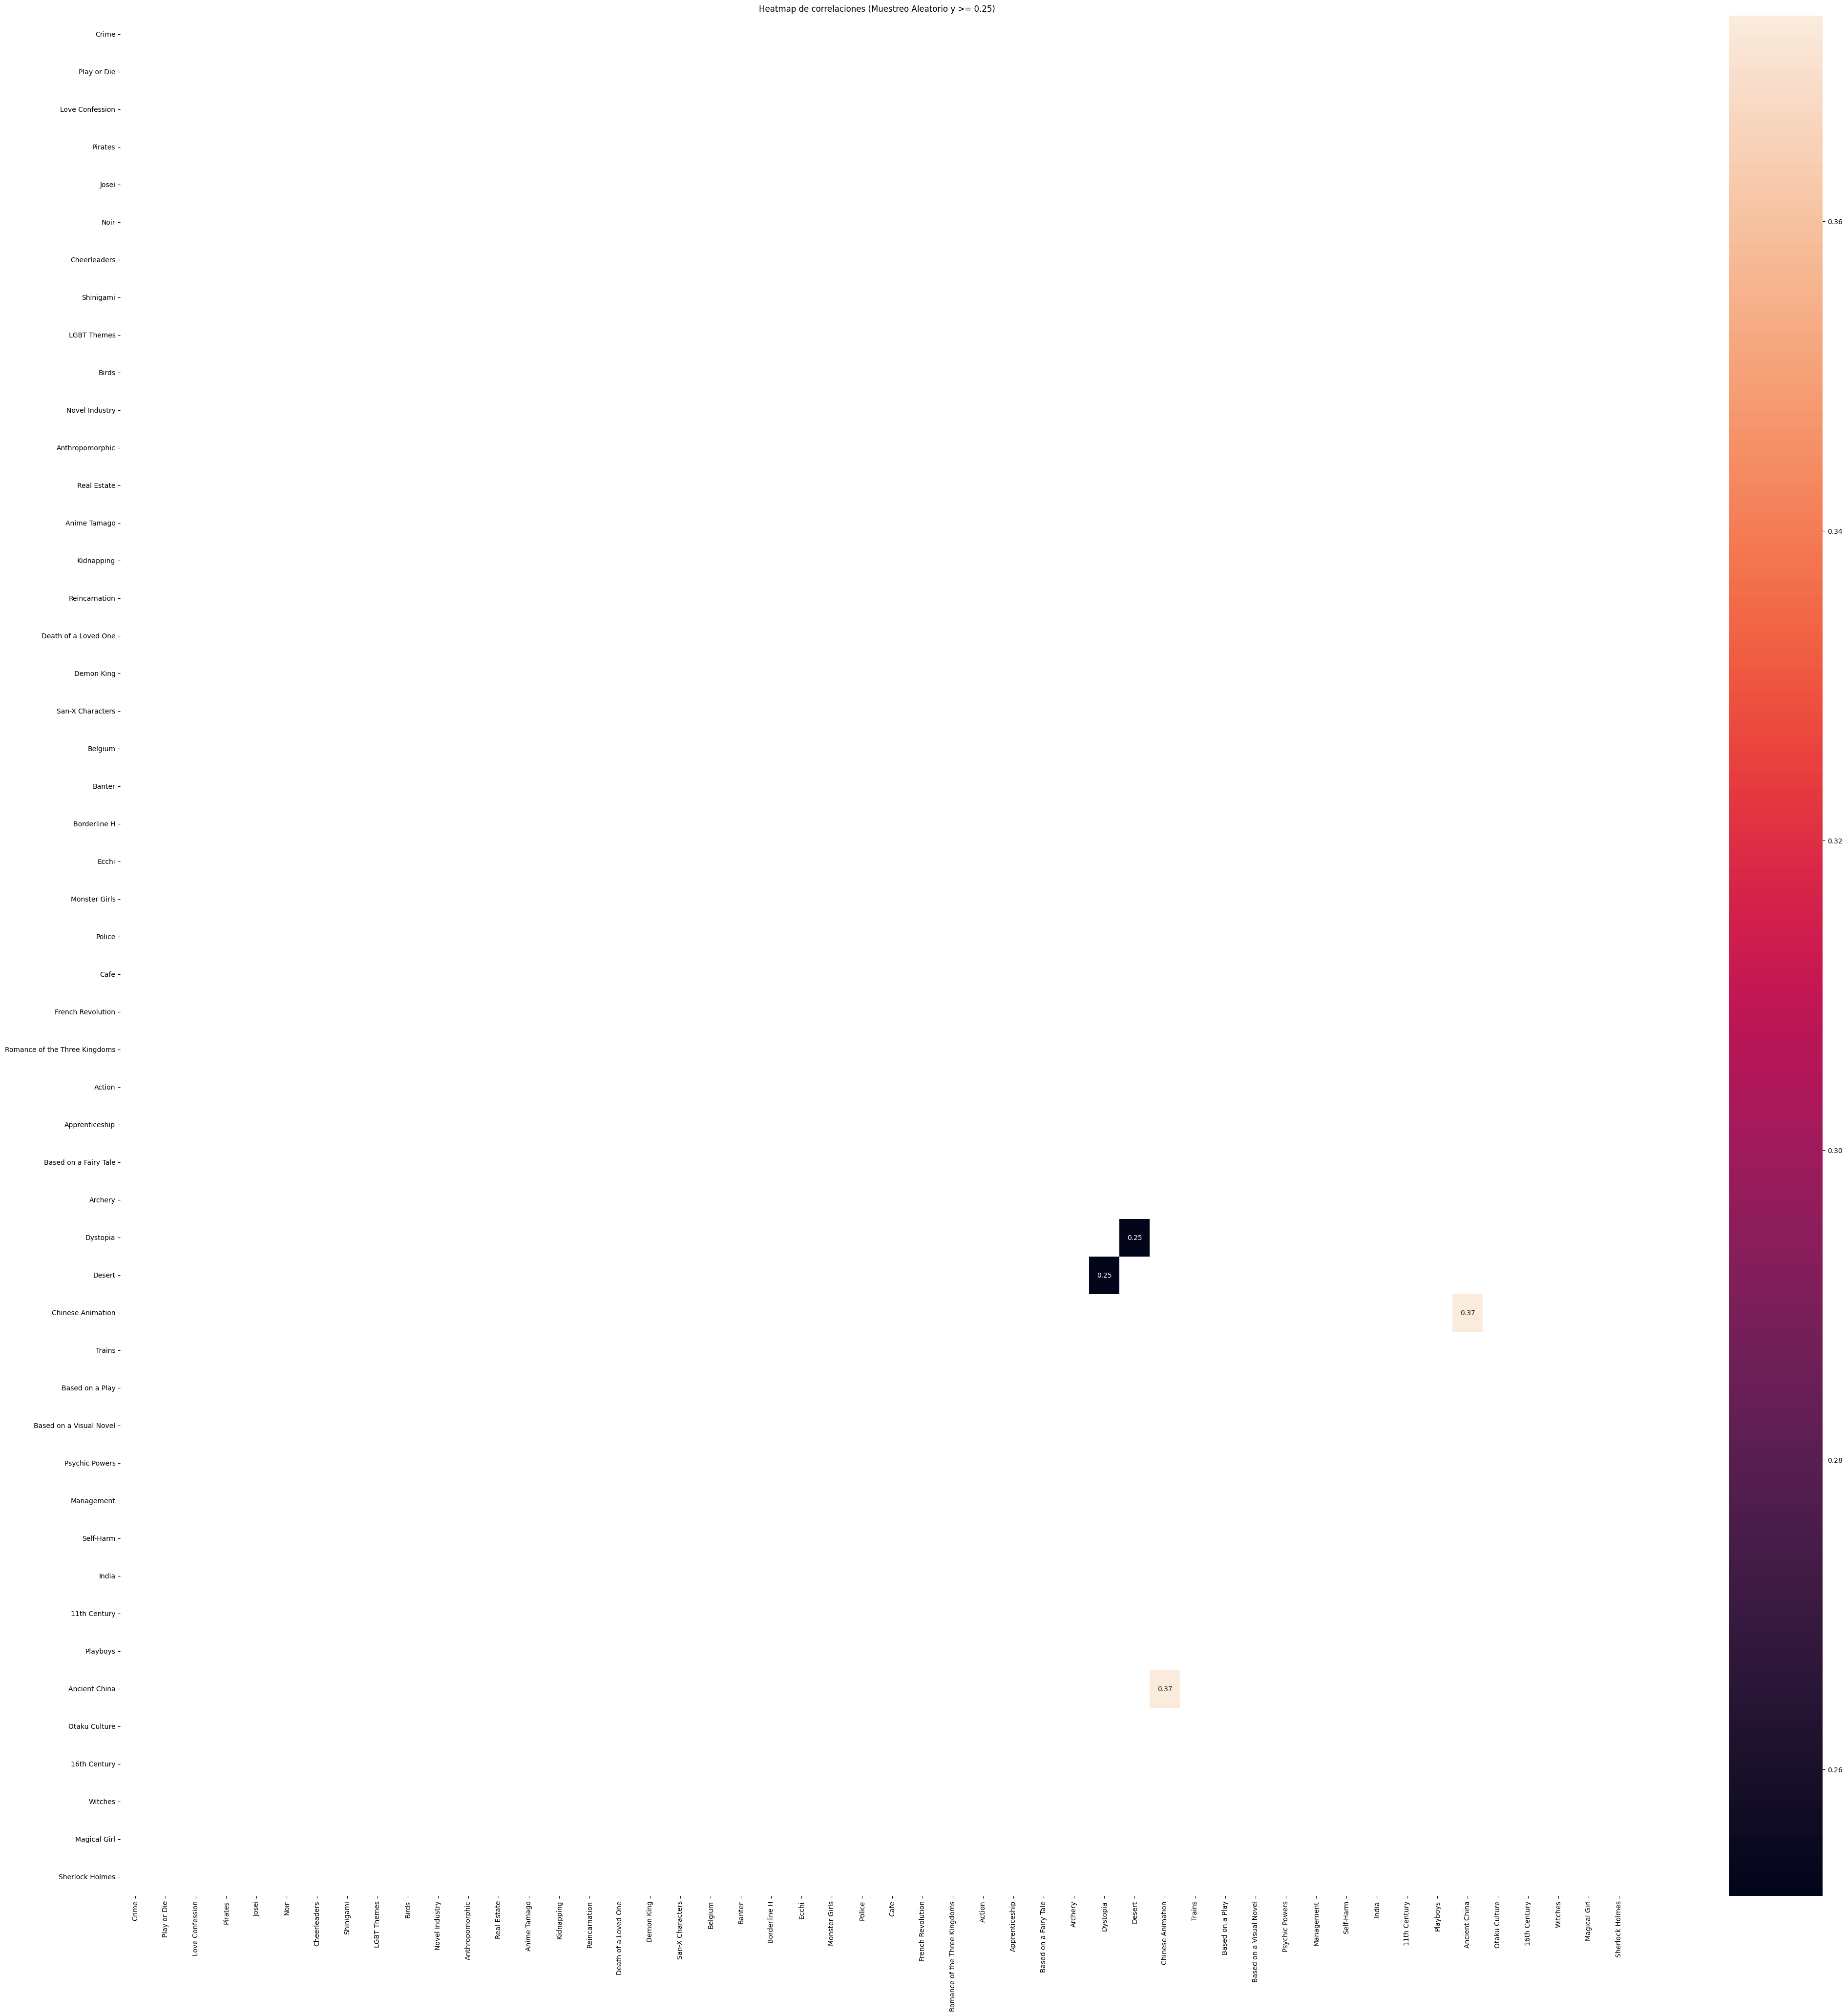

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


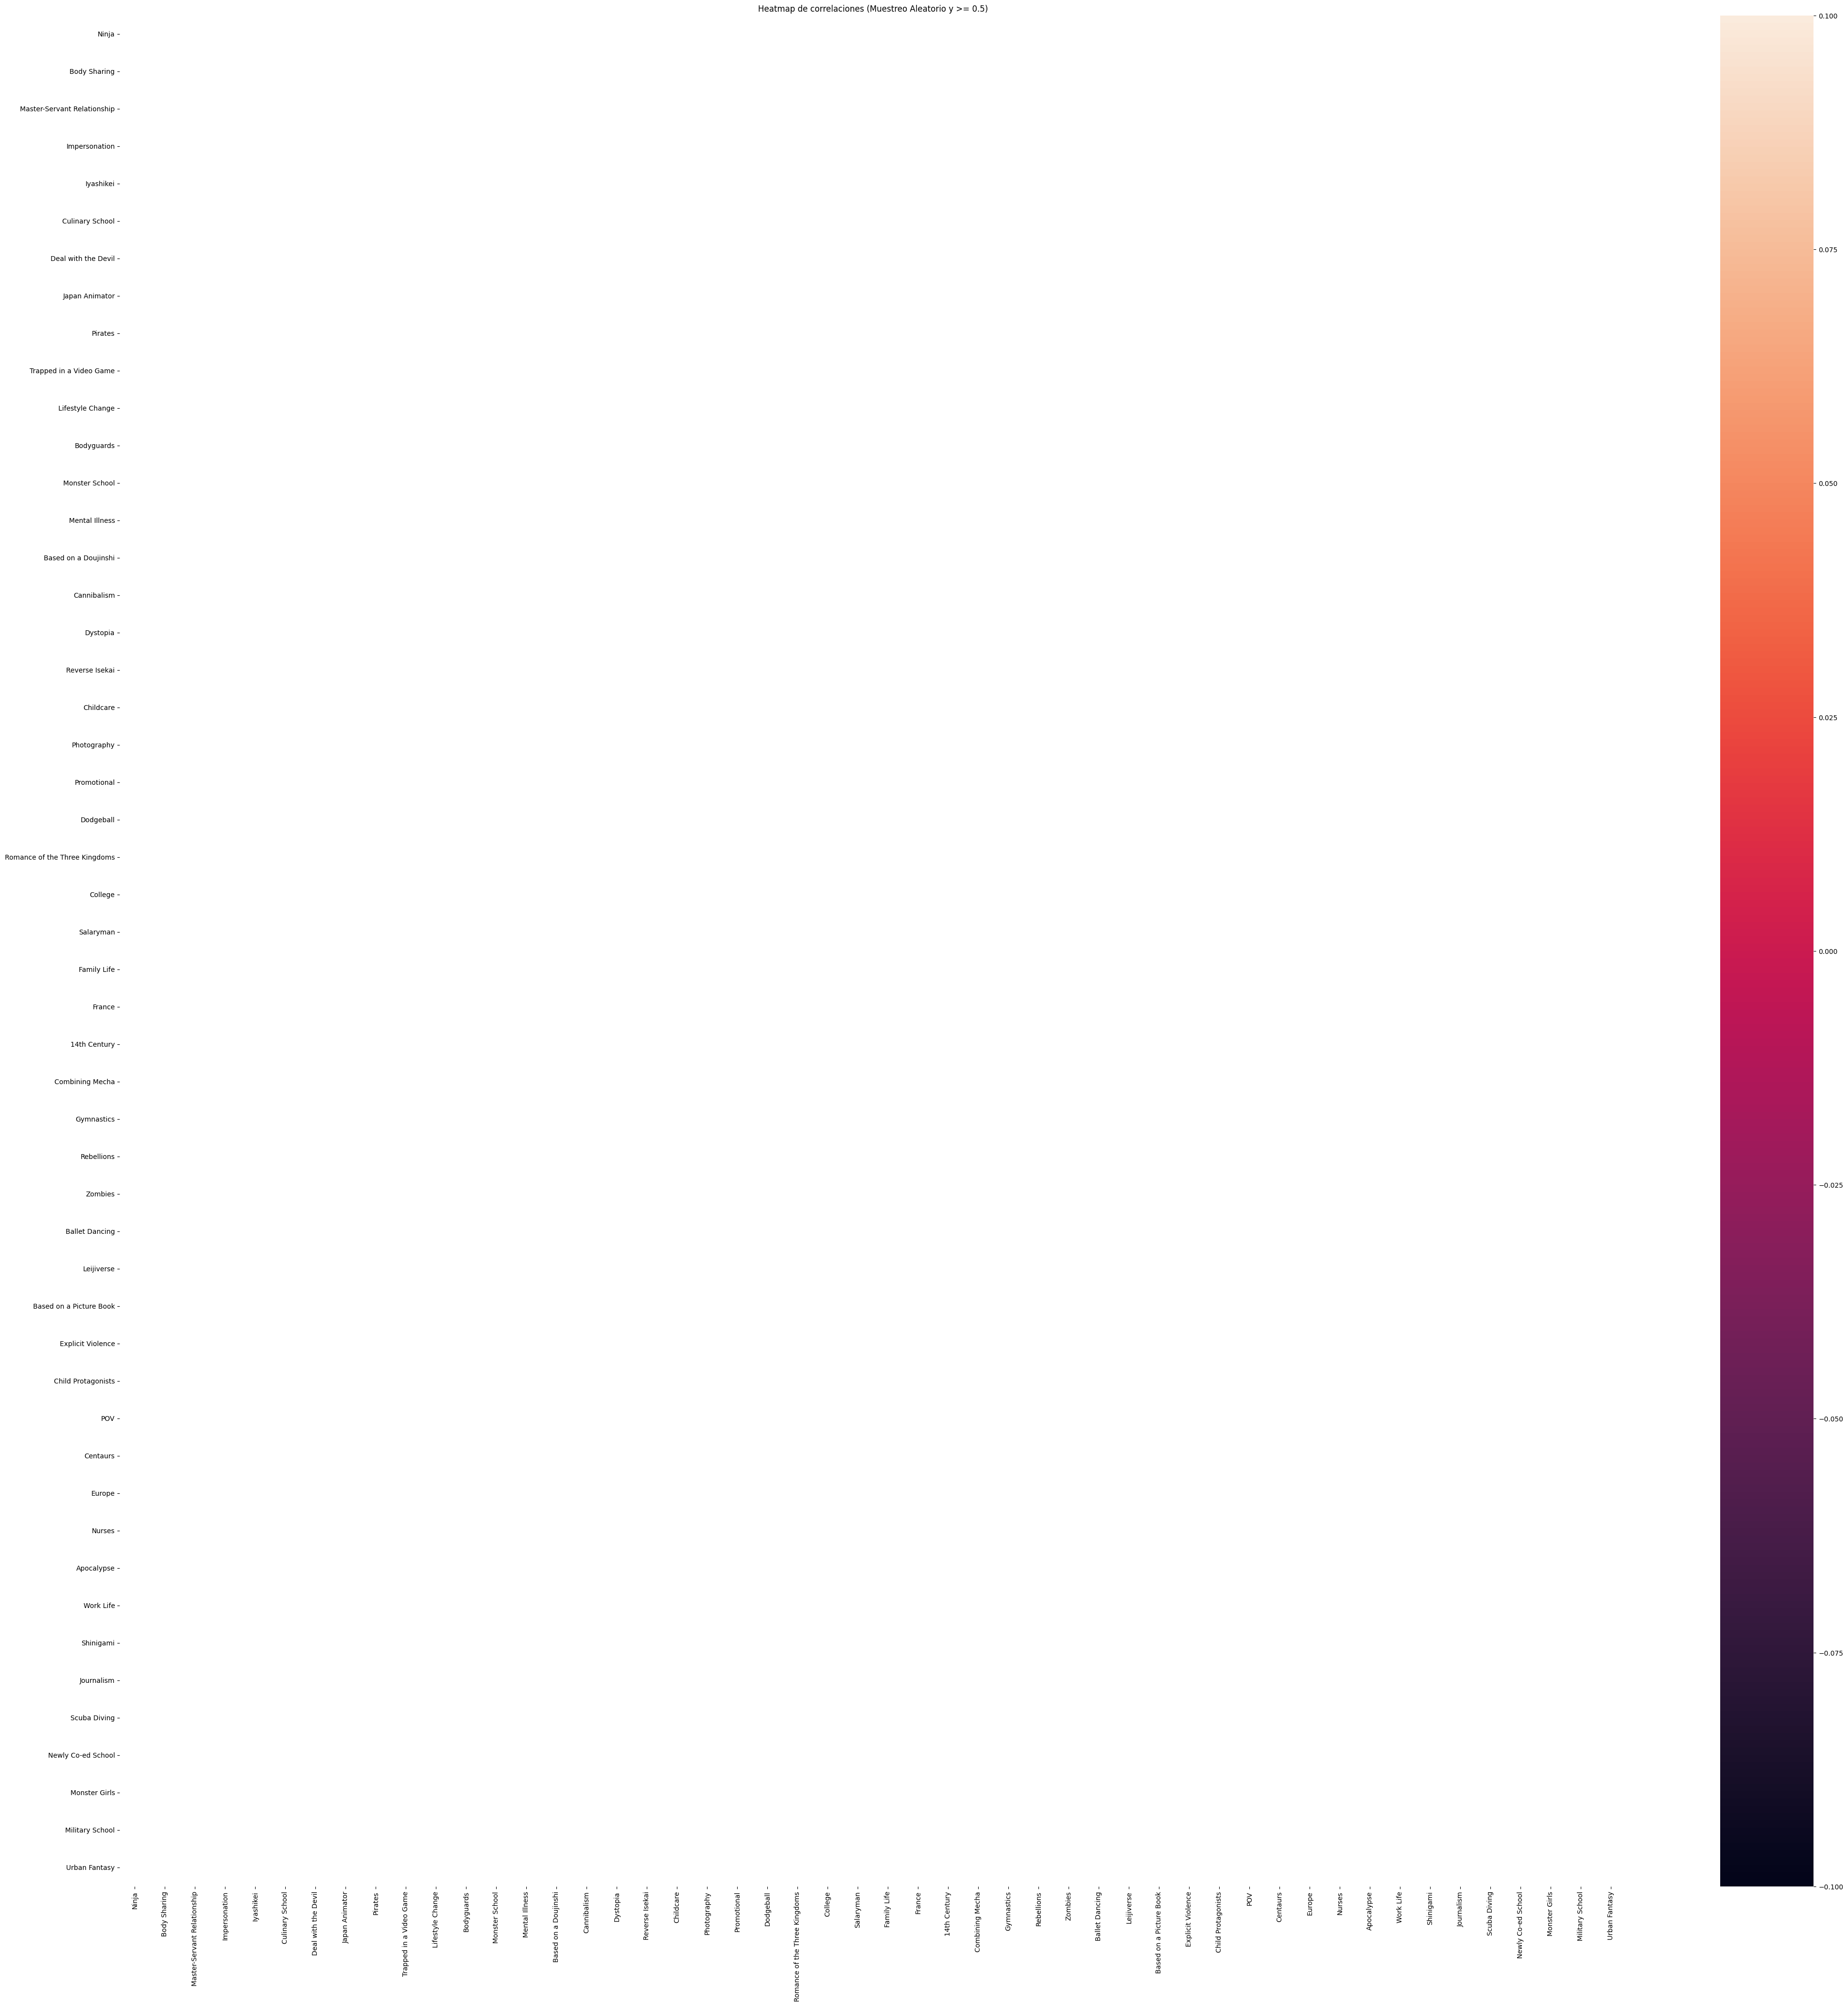

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


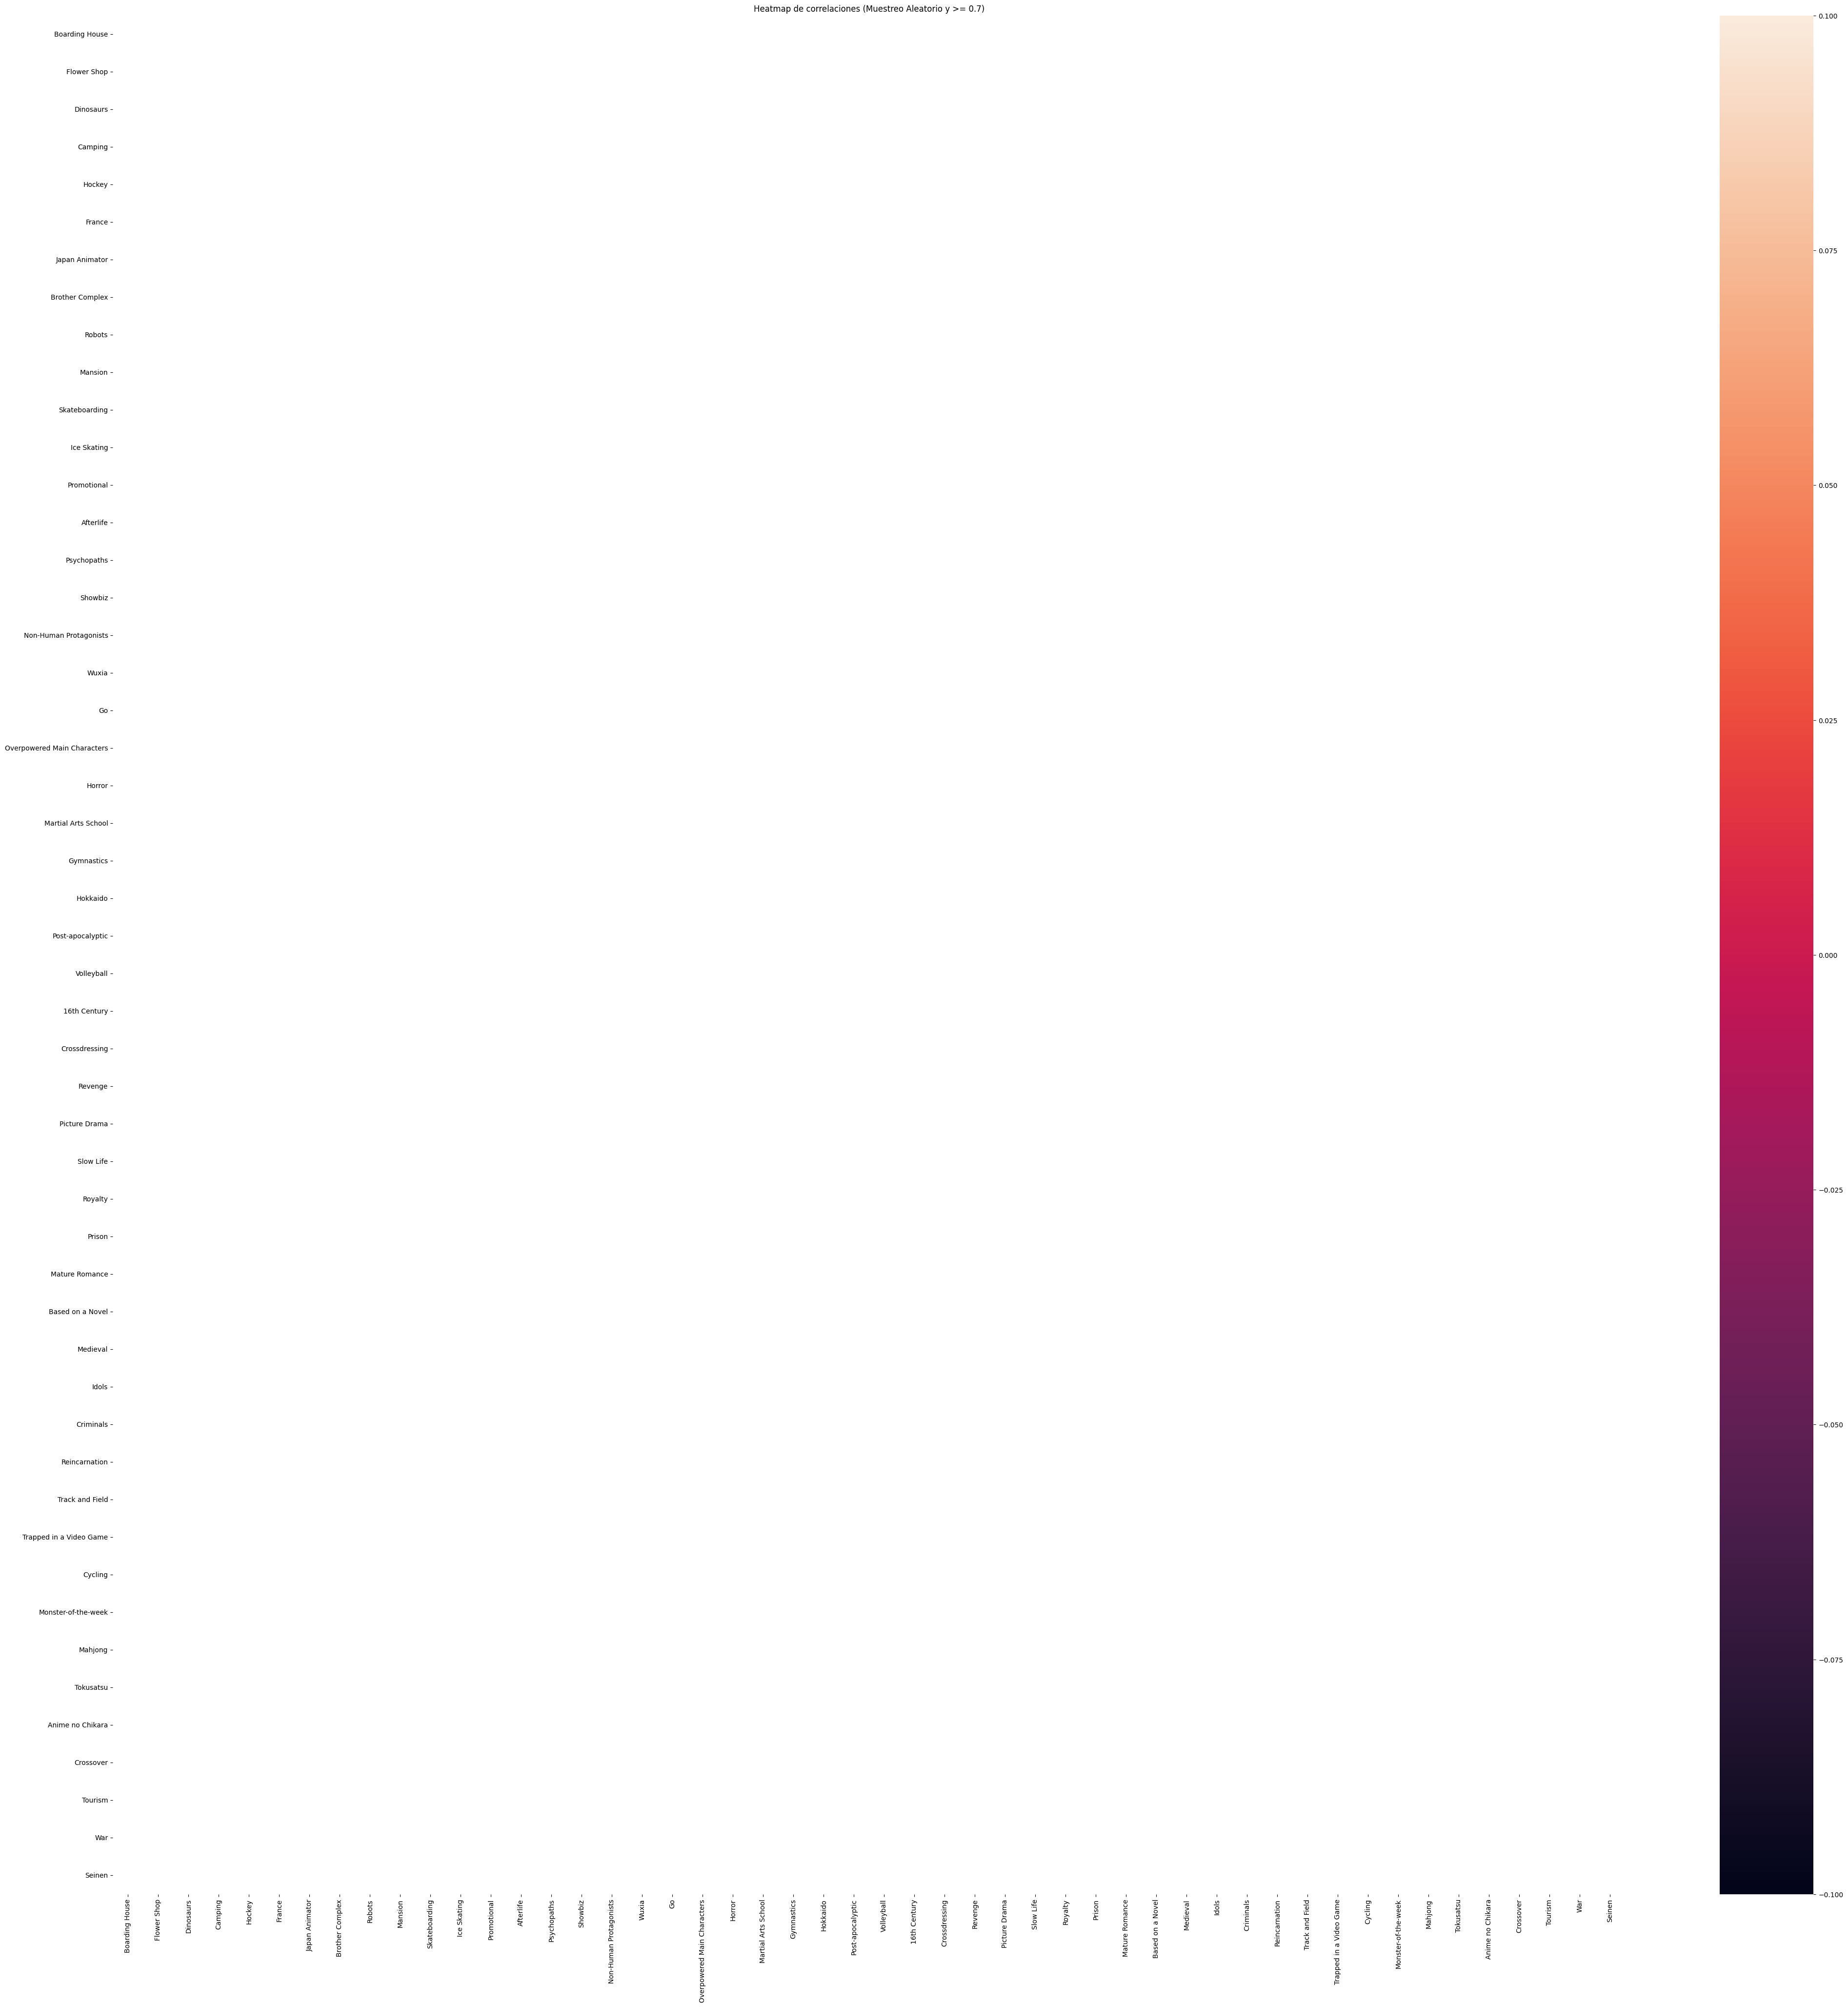

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


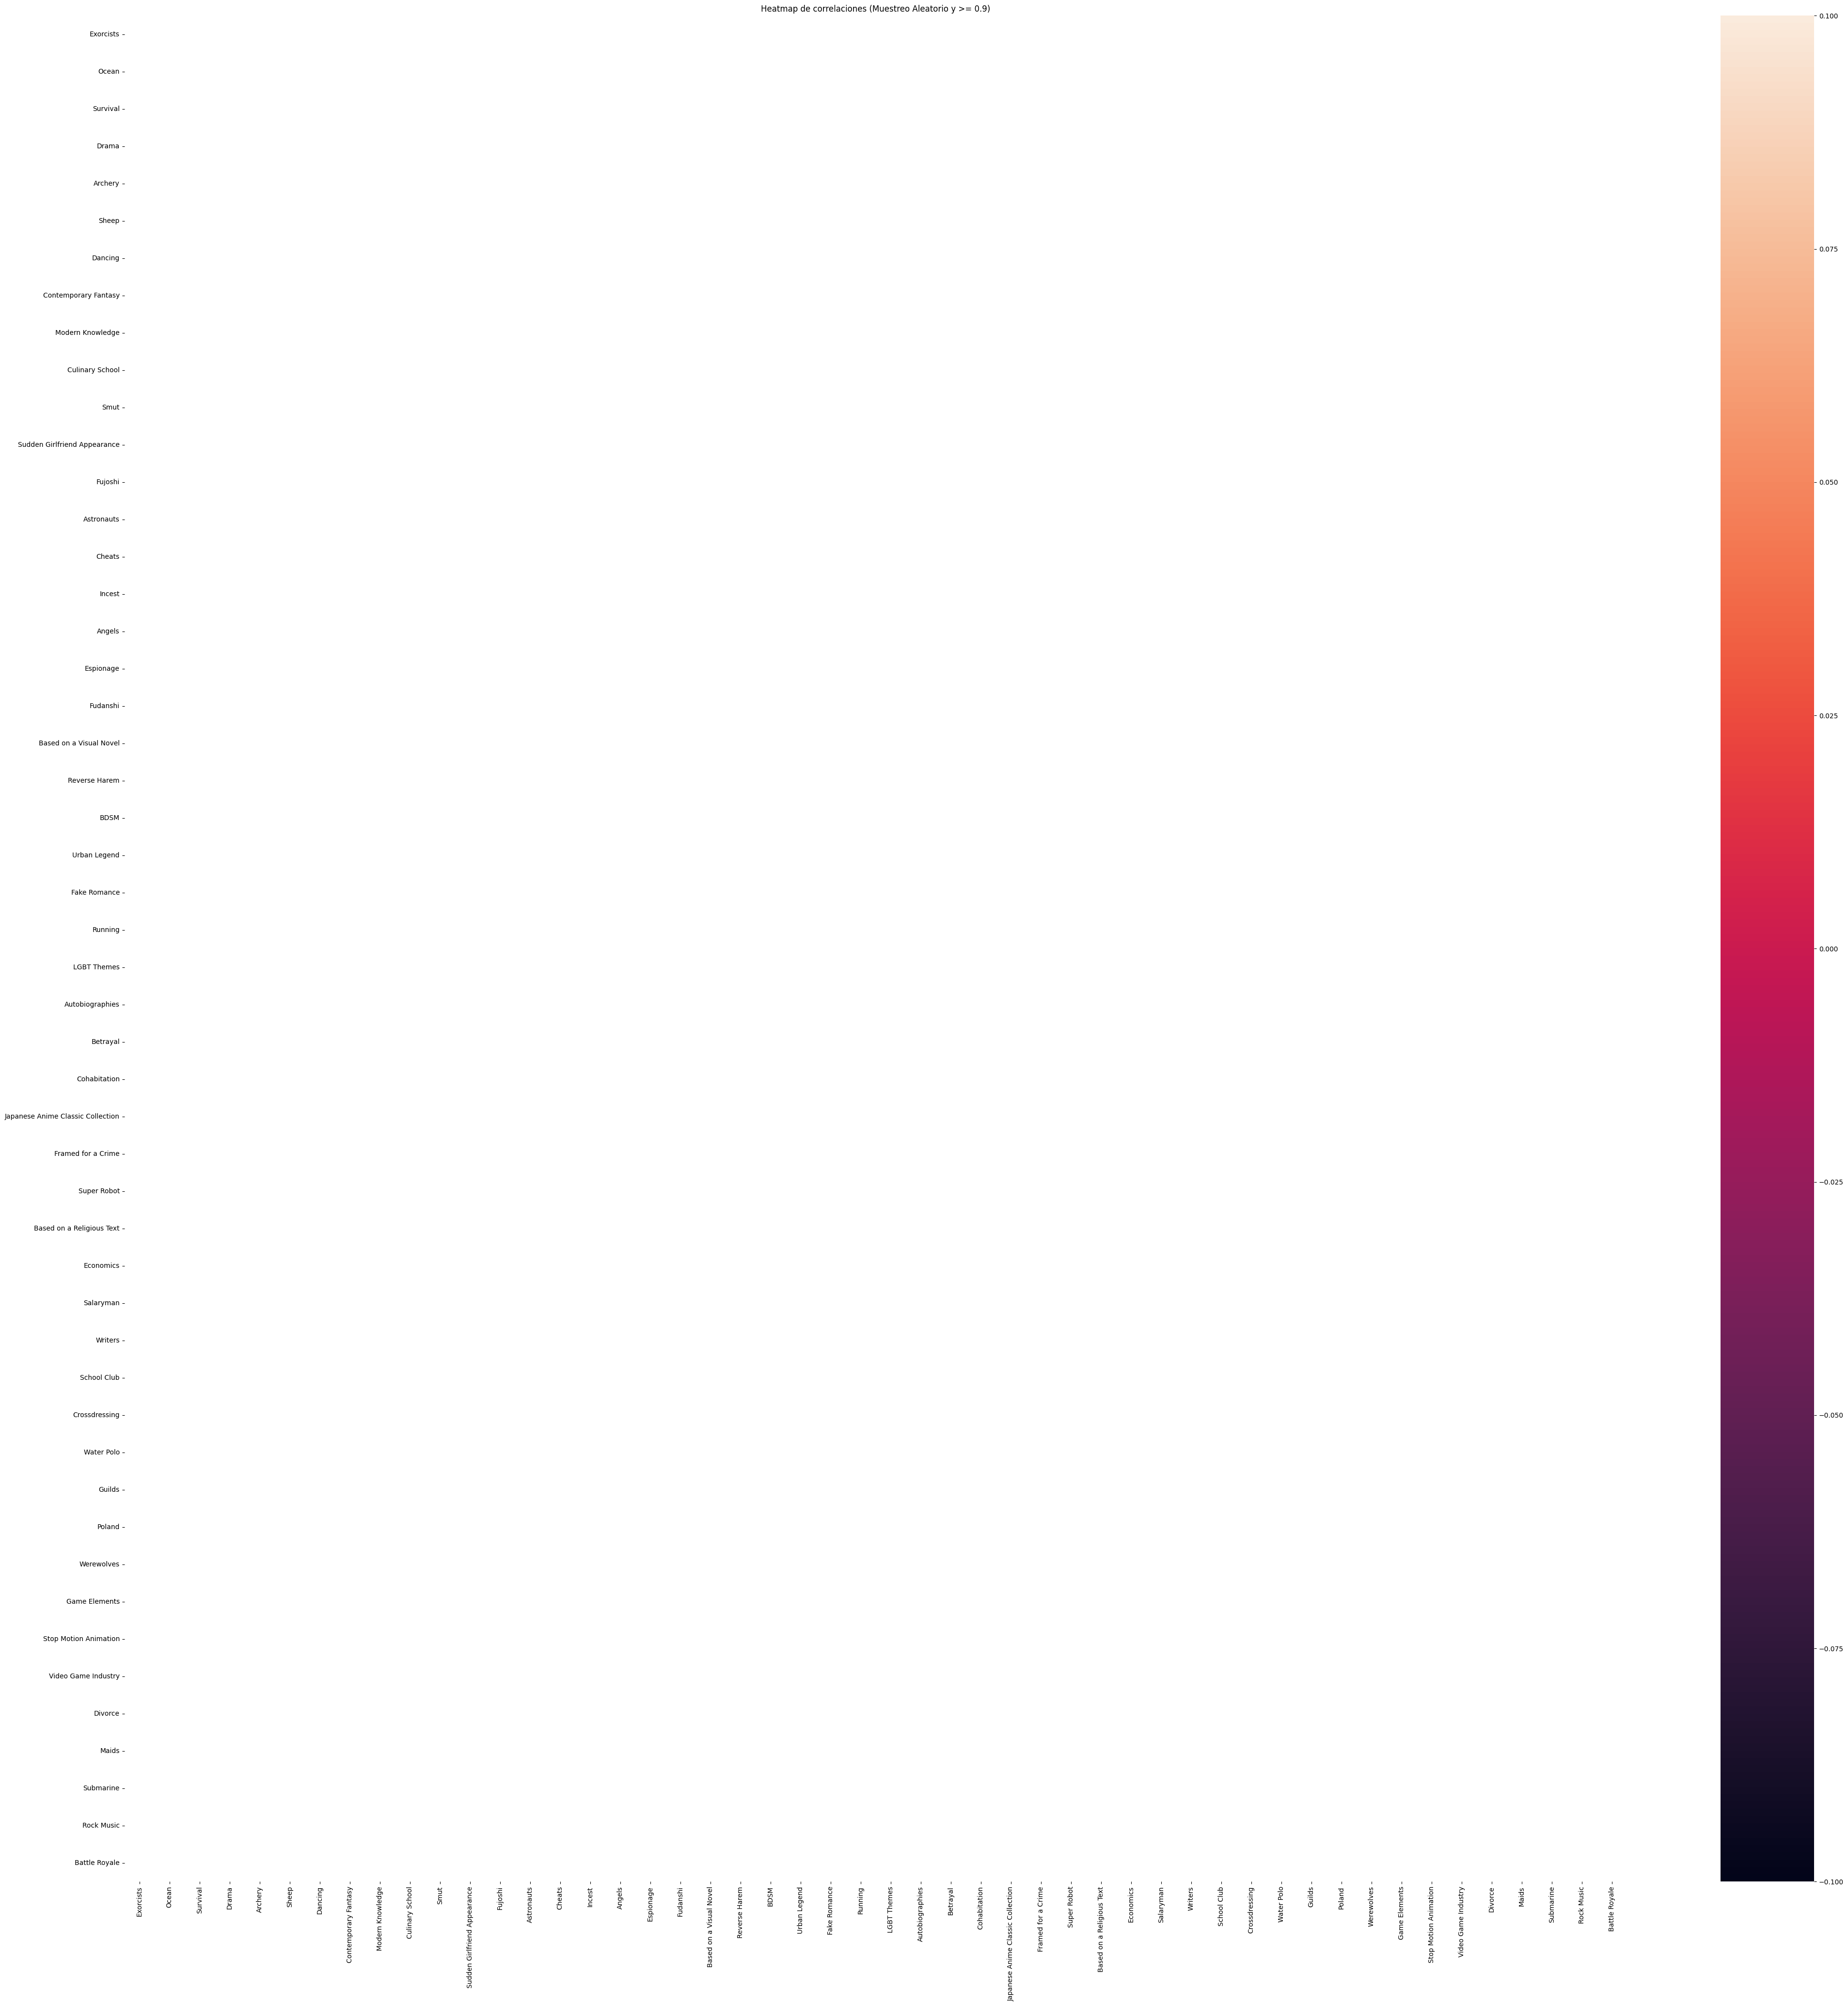

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


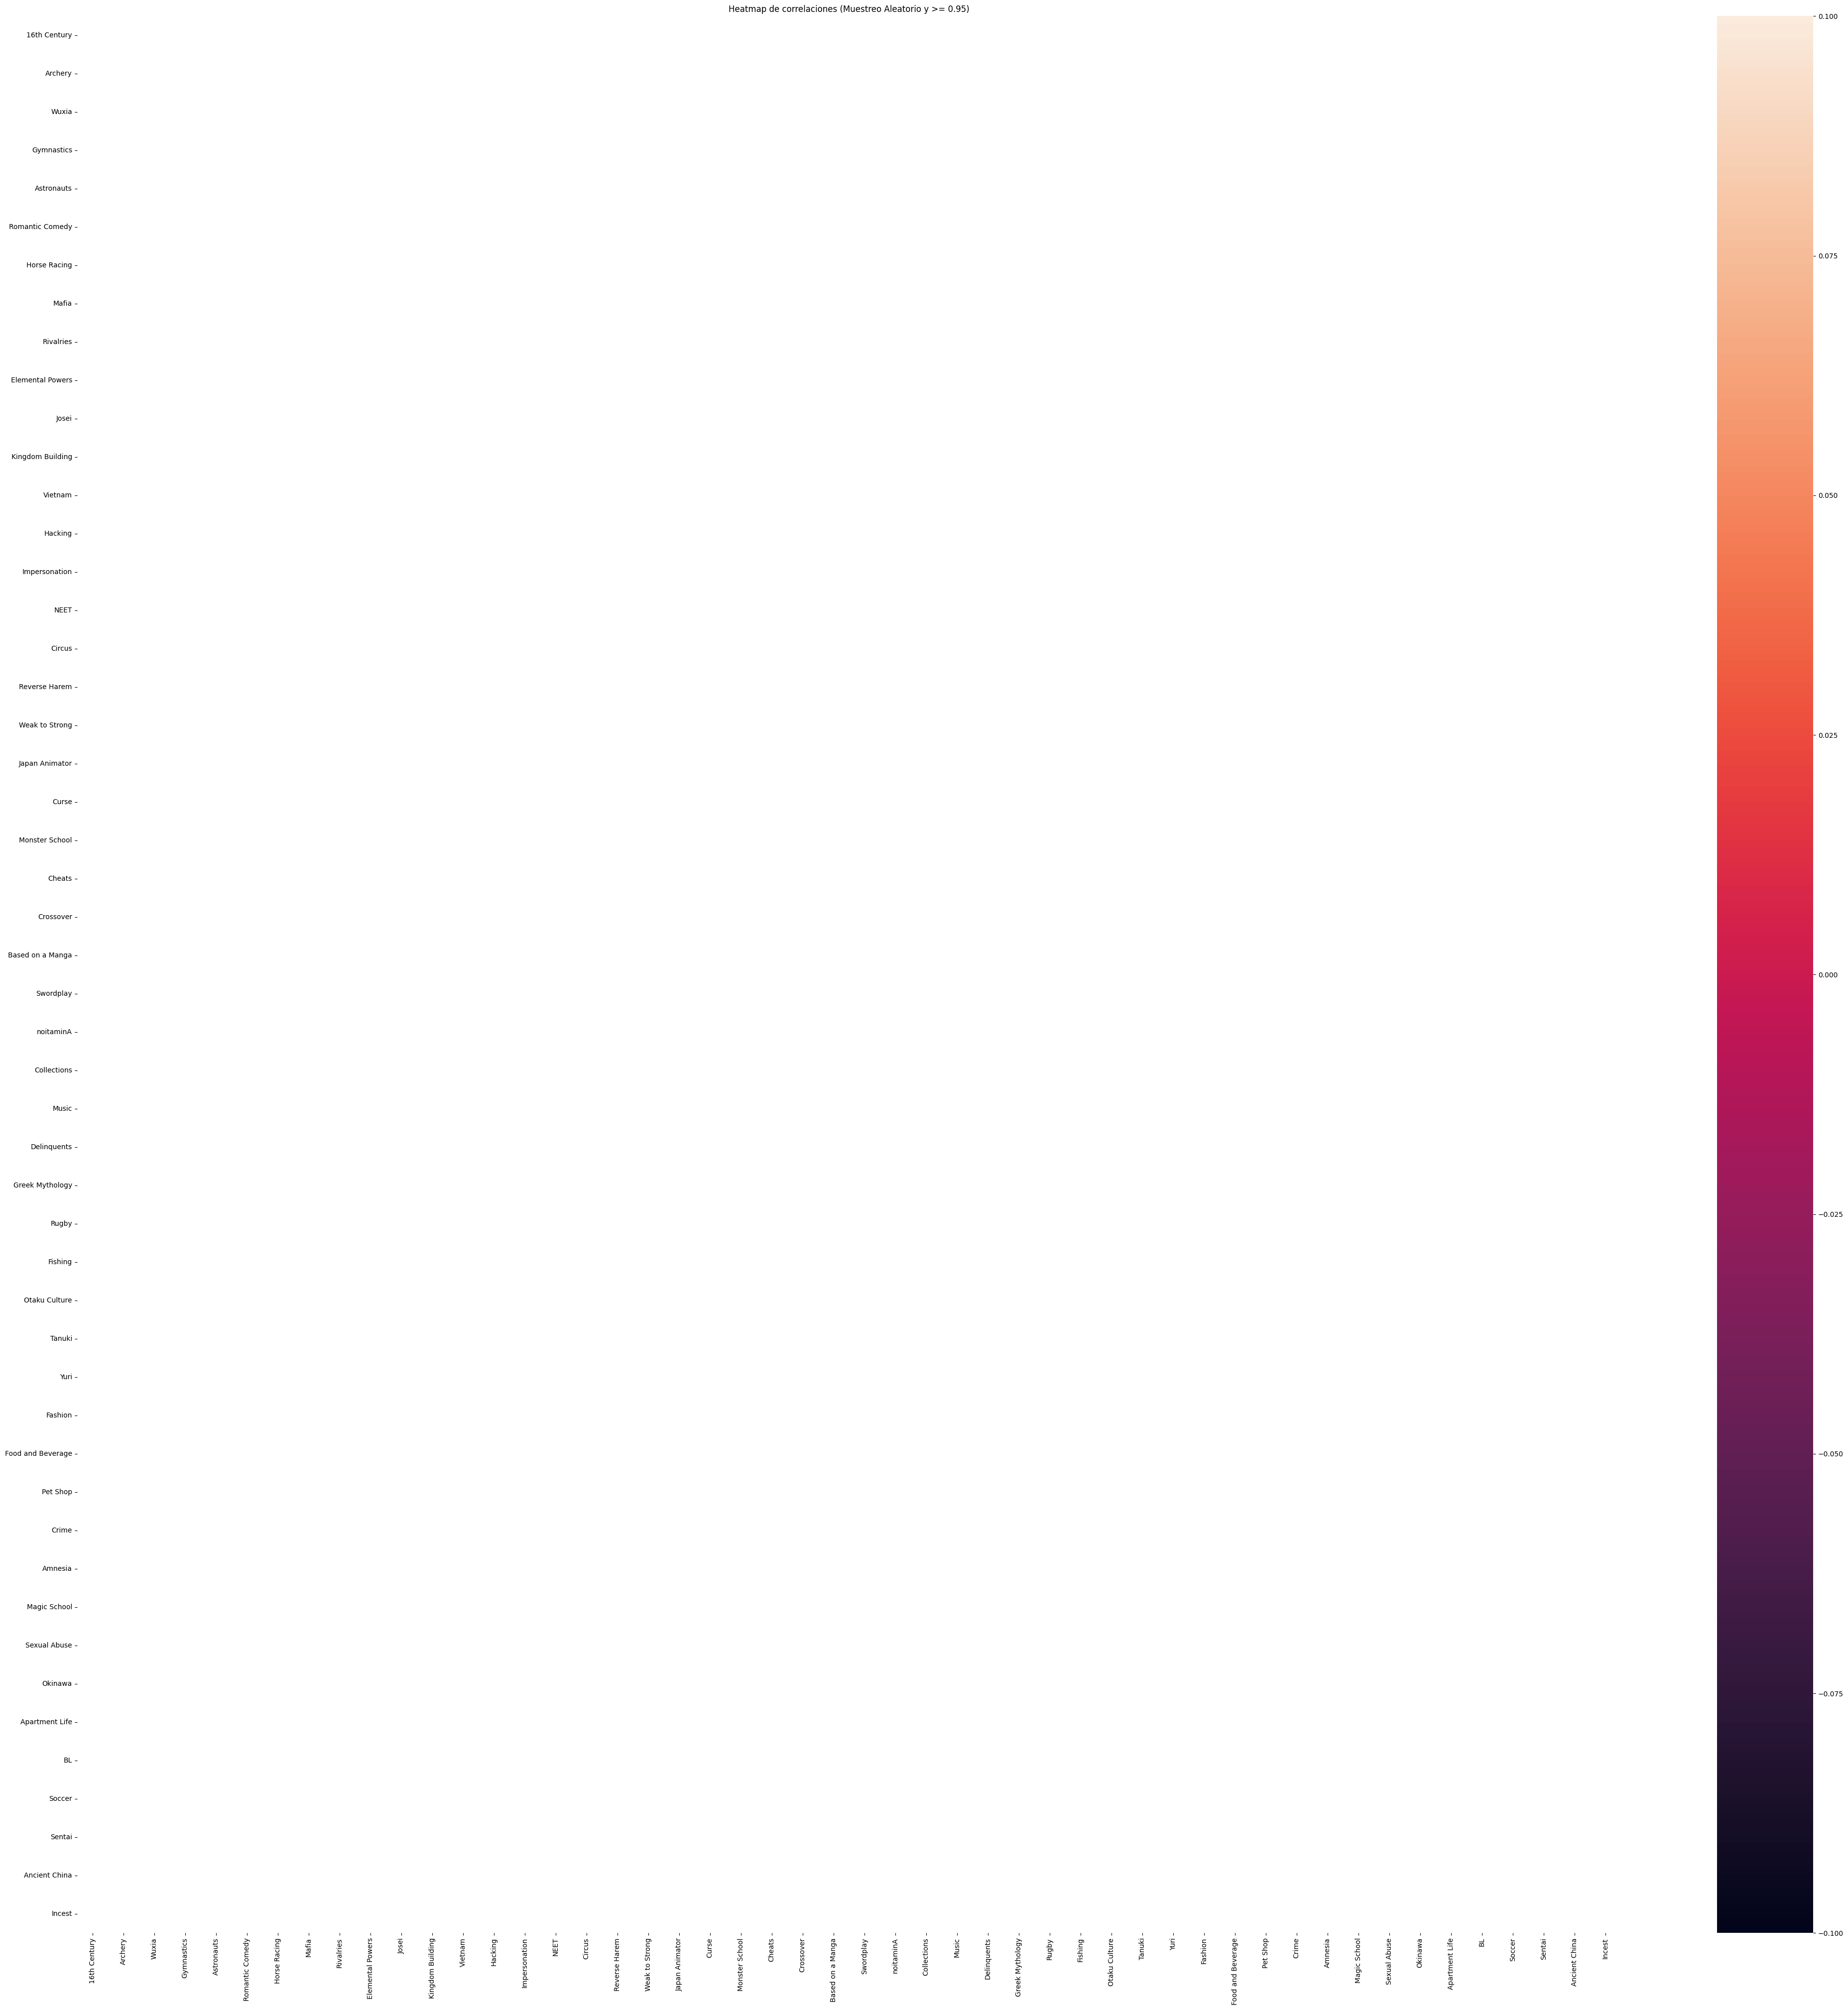

In [35]:
# Correlacción de forma gráfica.

# El plan es el siguiente: Dado que hay muchas columnas, solo se considerarán las correlacciones
# que sea >= 0.5. En otro gráfico, para ampliar, correlacciones >=0.7. En otro, >=0.9. Y por
# último, en otro gráfico, >=0.95.

# Para ello, se hará un bucle que itere sobre los valores de correlacción que se quieren
# considerar. En cada iteración, se hará un subset del DataFrame de correlacciones, considerando
# solamente las correlacciones que sean >= al valor de correlacción que se está considerando en la
# iteración actual. Luego, se hará un heatmap con el subset. Sin embargo, no considerar la diagonal
# donde la correlacción es 1, ya que no tiene sentido considerar la correlacción de un tag consigo
# mismo. Además, se hará un subplot para cada iteración, para que se vea mejor.

# Se considerarán los siguientes valores de correlacción: 0.5, 0.7, 0.9, 0.95

# Número máximo de columnas a mostrar en el heatmap
max_columns_to_show = 50

# Lista de valores de correlación a considerar
corr_values_to_show = [0.25, 0.5, 0.7, 0.9, 0.95]

for corr_value in corr_values_to_show:
    # Seleccionar un subconjunto aleatorio de columnas
    random_columns = random.sample(
        tags_animes.columns.tolist(),
        k=min(max_columns_to_show, len(tags_animes.columns)),
    )

    # Crear el subset de correlaciones
    corr_subset = tags_animes[random_columns].corr()

    # Filtrar solo las correlaciones que son >= al valor de correlación deseado
    corr_subset = corr_subset[corr_subset.abs() >= corr_value]

    # Eliminar la diagonal estableciéndola a NaN
    np.fill_diagonal(corr_subset.values, np.nan)

    # Obtener el número de filas y columnas del subset
    rows, cols = corr_subset.shape

    # Crear el subplot
    fig, ax = plt.subplots(figsize=(cols, rows))

    # Crear el heatmap
    sns.heatmap(corr_subset, annot=True, ax=ax)

    # Ponerle título al heatmap
    ax.set_title(f"Heatmap de correlaciones (Muestreo Aleatorio y >= {corr_value})")

    # Mostrar el heatmap
    plt.show()

In [36]:
# En específico, imprimir las correlaciones >= 0.95, que no sean con el mismo tag (diagonal).

corr_subset = tags_animes.corr()[tags_animes.corr() >= 0.95]

print("Correlaciones >= 0.95:")
for col in corr_subset.columns:
    for row in corr_subset.index:
        if col != row and not np.isnan(corr_subset.loc[row, col]):  # type: ignore
            print(
                f"\t{row} y {col} tienen una correlación de {corr_subset.loc[row, col]}"
            )

Correlaciones >= 0.95:
	9th Century y 19th Century tienen una correlación de 0.9944330414364411
	BL y Shounen-ai tienen una correlación de 0.9694671903042554
	19th Century y 9th Century tienen una correlación de 0.9944330414364411
	Shounen-ai y BL tienen una correlación de 0.9694671903042554
	Shoujo-ai y GL tienen una correlación de 0.9664353820637148
	6th Century y 16th Century tienen una correlación de 0.9510810548635167
	16th Century y 6th Century tienen una correlación de 0.9510810548635167
	GL y Shoujo-ai tienen una correlación de 0.9664353820637148


Veamos las correlaciones positivas más significativas:

Shounen-ai y BL tiene sentido si se buscan ambos conceptos en internet, pues aluden a lo mismo o
muy similar. Básicamente, la noción de romance.

19th Century y 9th Century también puede que tenga sentido, pues puede tratarse de obras históricas
que cubren grandes períodos de tiempo.

16th Century y 6th Century tiene sentido por la misma razón que el anterior. Igualmente puede que
ciertos animes estén mal etiquetados, y por ende tenga sentido que se relacionen.

GL y Shoujo-ai también tiene sentido, pues aluden a lo mismo o muy similar. Básicamente, la noción
de romance.

Ampliar el margen de búsqueda para ver si se encuentran más correlaciones positivas significativas:

In [38]:
# En específico, imprimir las correlaciones >= 0.95, que no sean con el mismo tag (diagonal).

corr_subset = tags_animes.corr()[tags_animes.corr() >= 0.75]

print("Correlaciones >= 0.75:")
for col in corr_subset.columns:
    for row in corr_subset.index:
        if col != row and not np.isnan(corr_subset.loc[row, col]):  # type: ignore
            print(
                f"\t{row} y {col} tienen una correlación de {corr_subset.loc[row, col]}"
            )

Correlaciones >= 0.75:
	Track and Field y Running tienen una correlación de 0.8164034532877452
	Yaoi Hand Syndrome y Yaoi tienen una correlación de 0.7975419895658006
	Art y Martial Arts tienen una correlación de 0.9349592675421542
	9th Century y 19th Century tienen una correlación de 0.9944330414364411
	BL y Shounen-ai tienen una correlación de 0.9694671903042554
	19th Century y 9th Century tienen una correlación de 0.9944330414364411
	Shounen-ai y BL tienen una correlación de 0.9694671903042554
	Kingdom Building y Management tienen una correlación de 0.7830662949689402
	Shoujo-ai y GL tienen una correlación de 0.9664353820637148
	Running y Track and Field tienen una correlación de 0.8164034532877452
	6th Century y 16th Century tienen una correlación de 0.9510810548635167
	Boarding House y Neighbors tienen una correlación de 0.7675204633642936
	Gods y Go tienen una correlación de 0.9379704039581459
	16th Century y 6th Century tienen una correlación de 0.9510810548635167
	Natural Disas

Viendo un vistazo rápido a lo obtenido, parece tener sentido la correlación altamente positiva
entre dichos tags, dado que los tags aluden a conceptos similares o muy relacionados intrínsecamente.

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


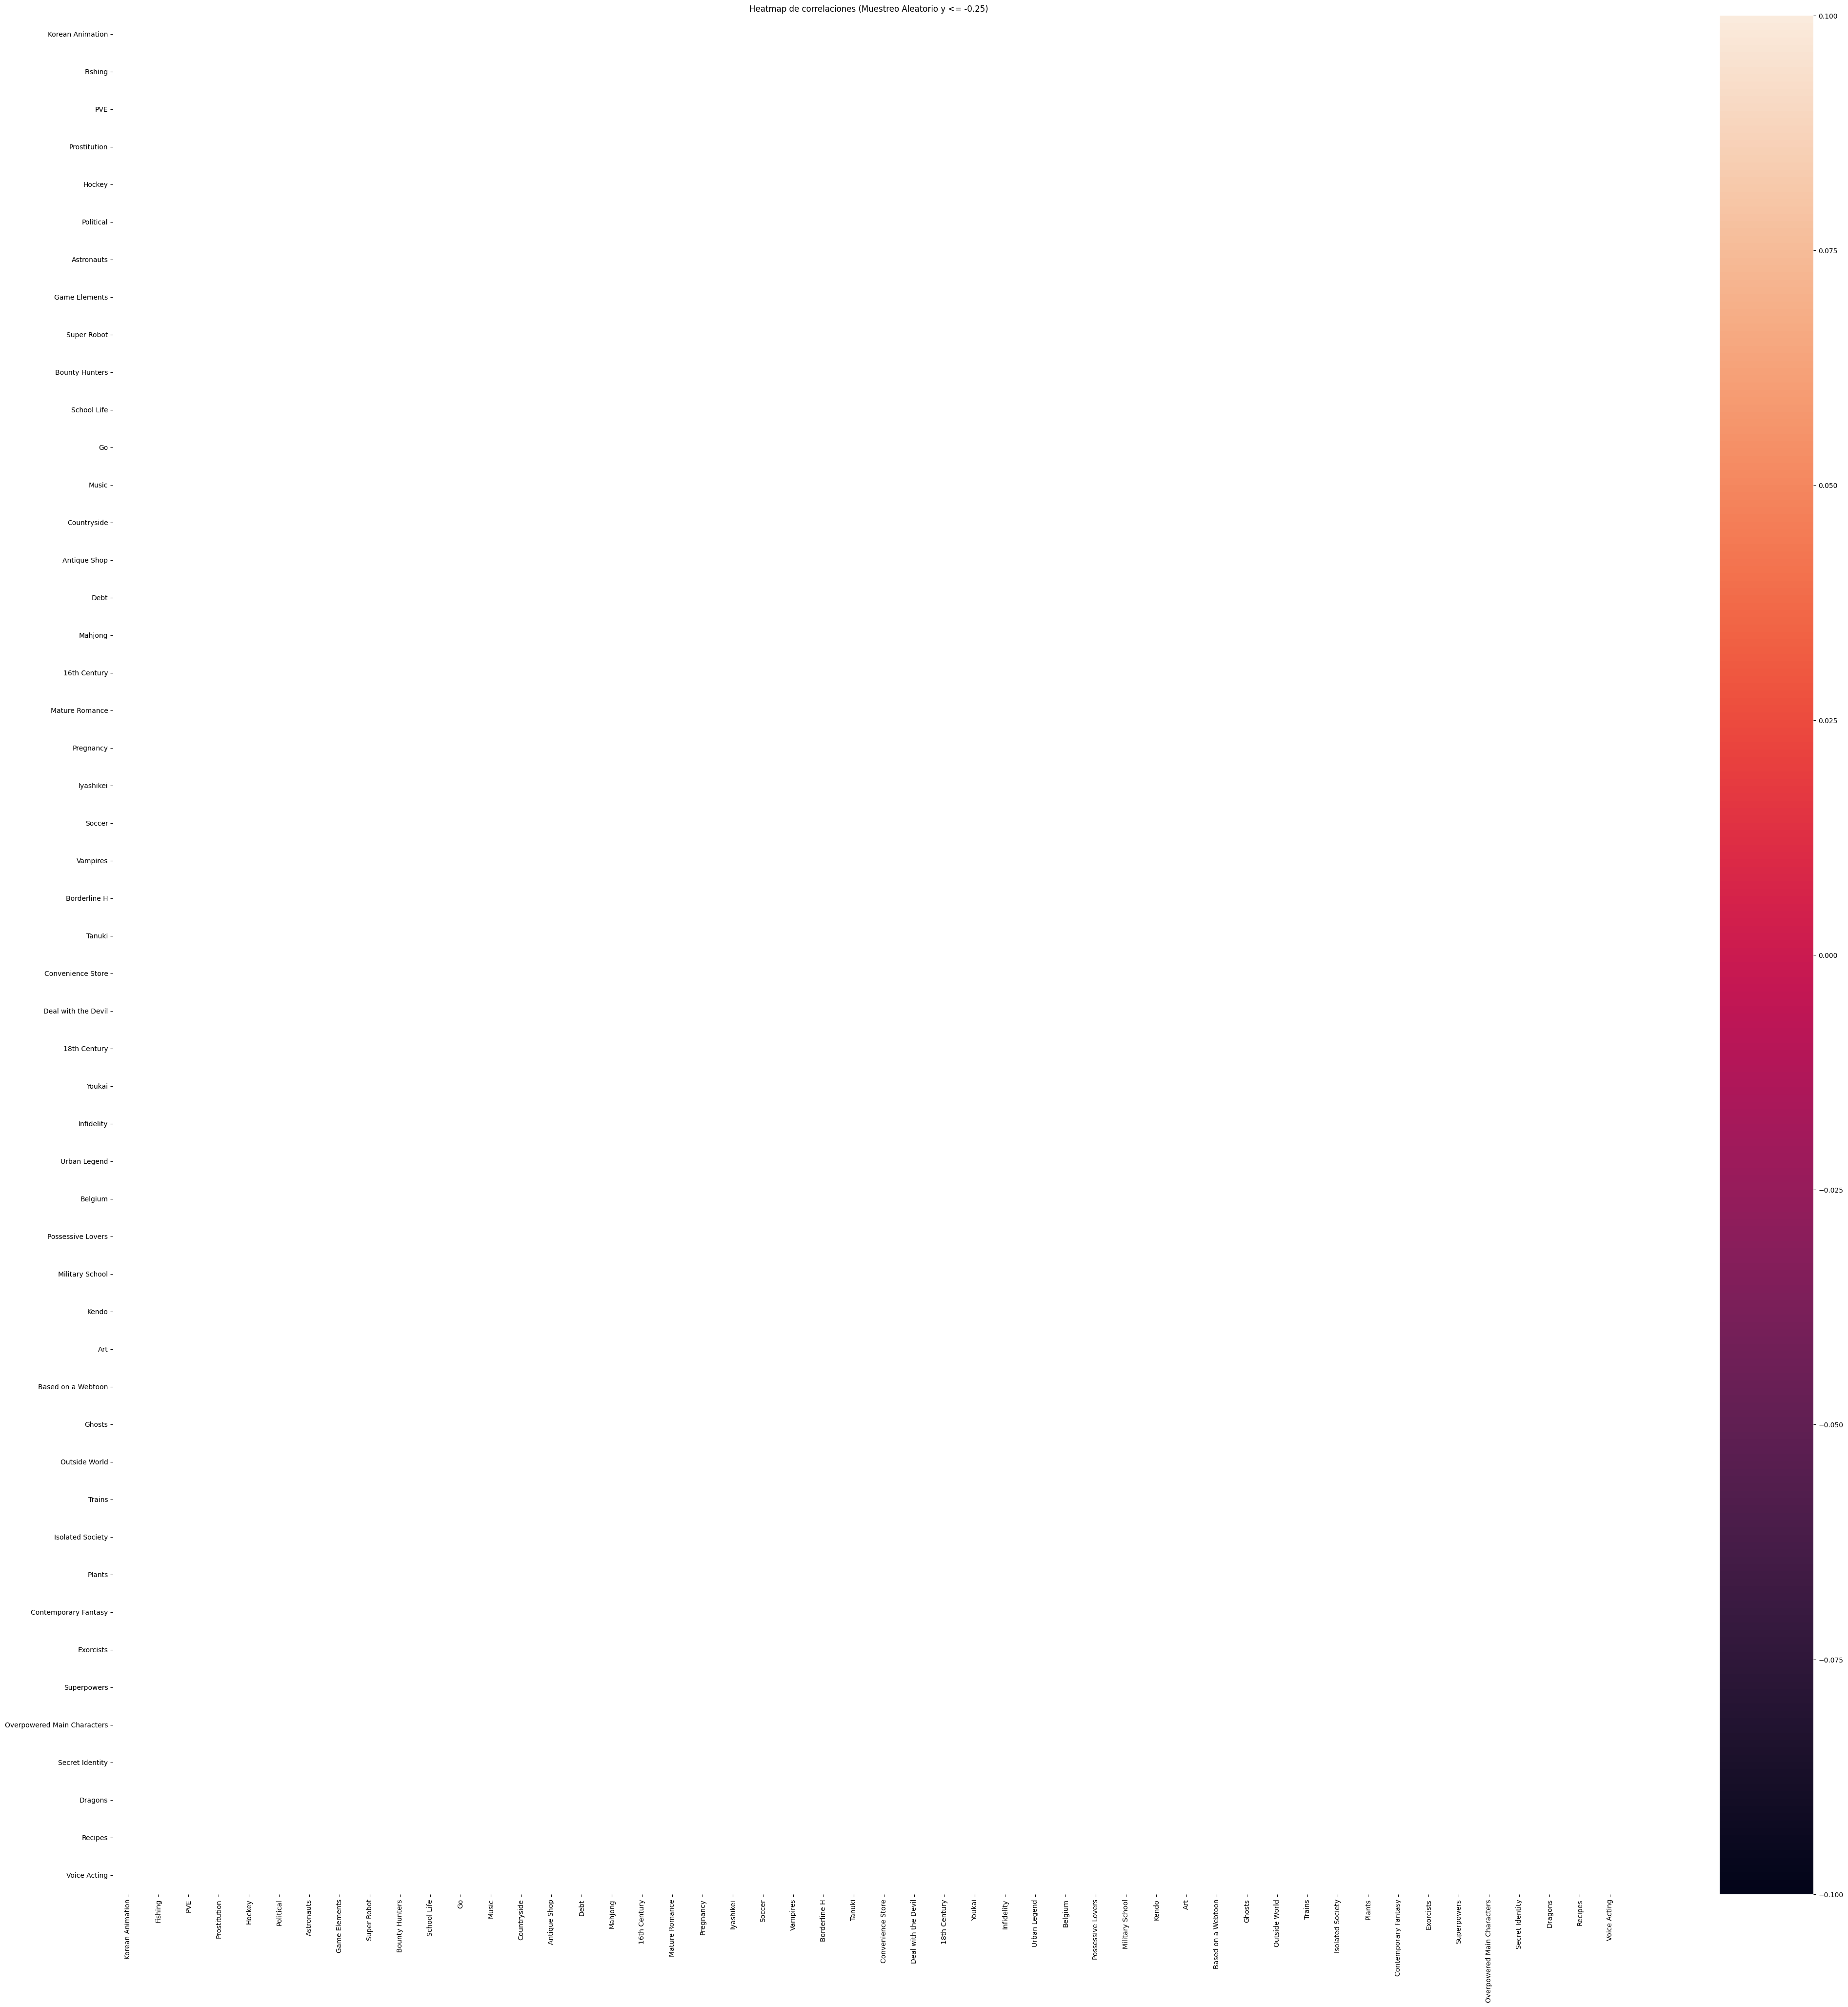

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


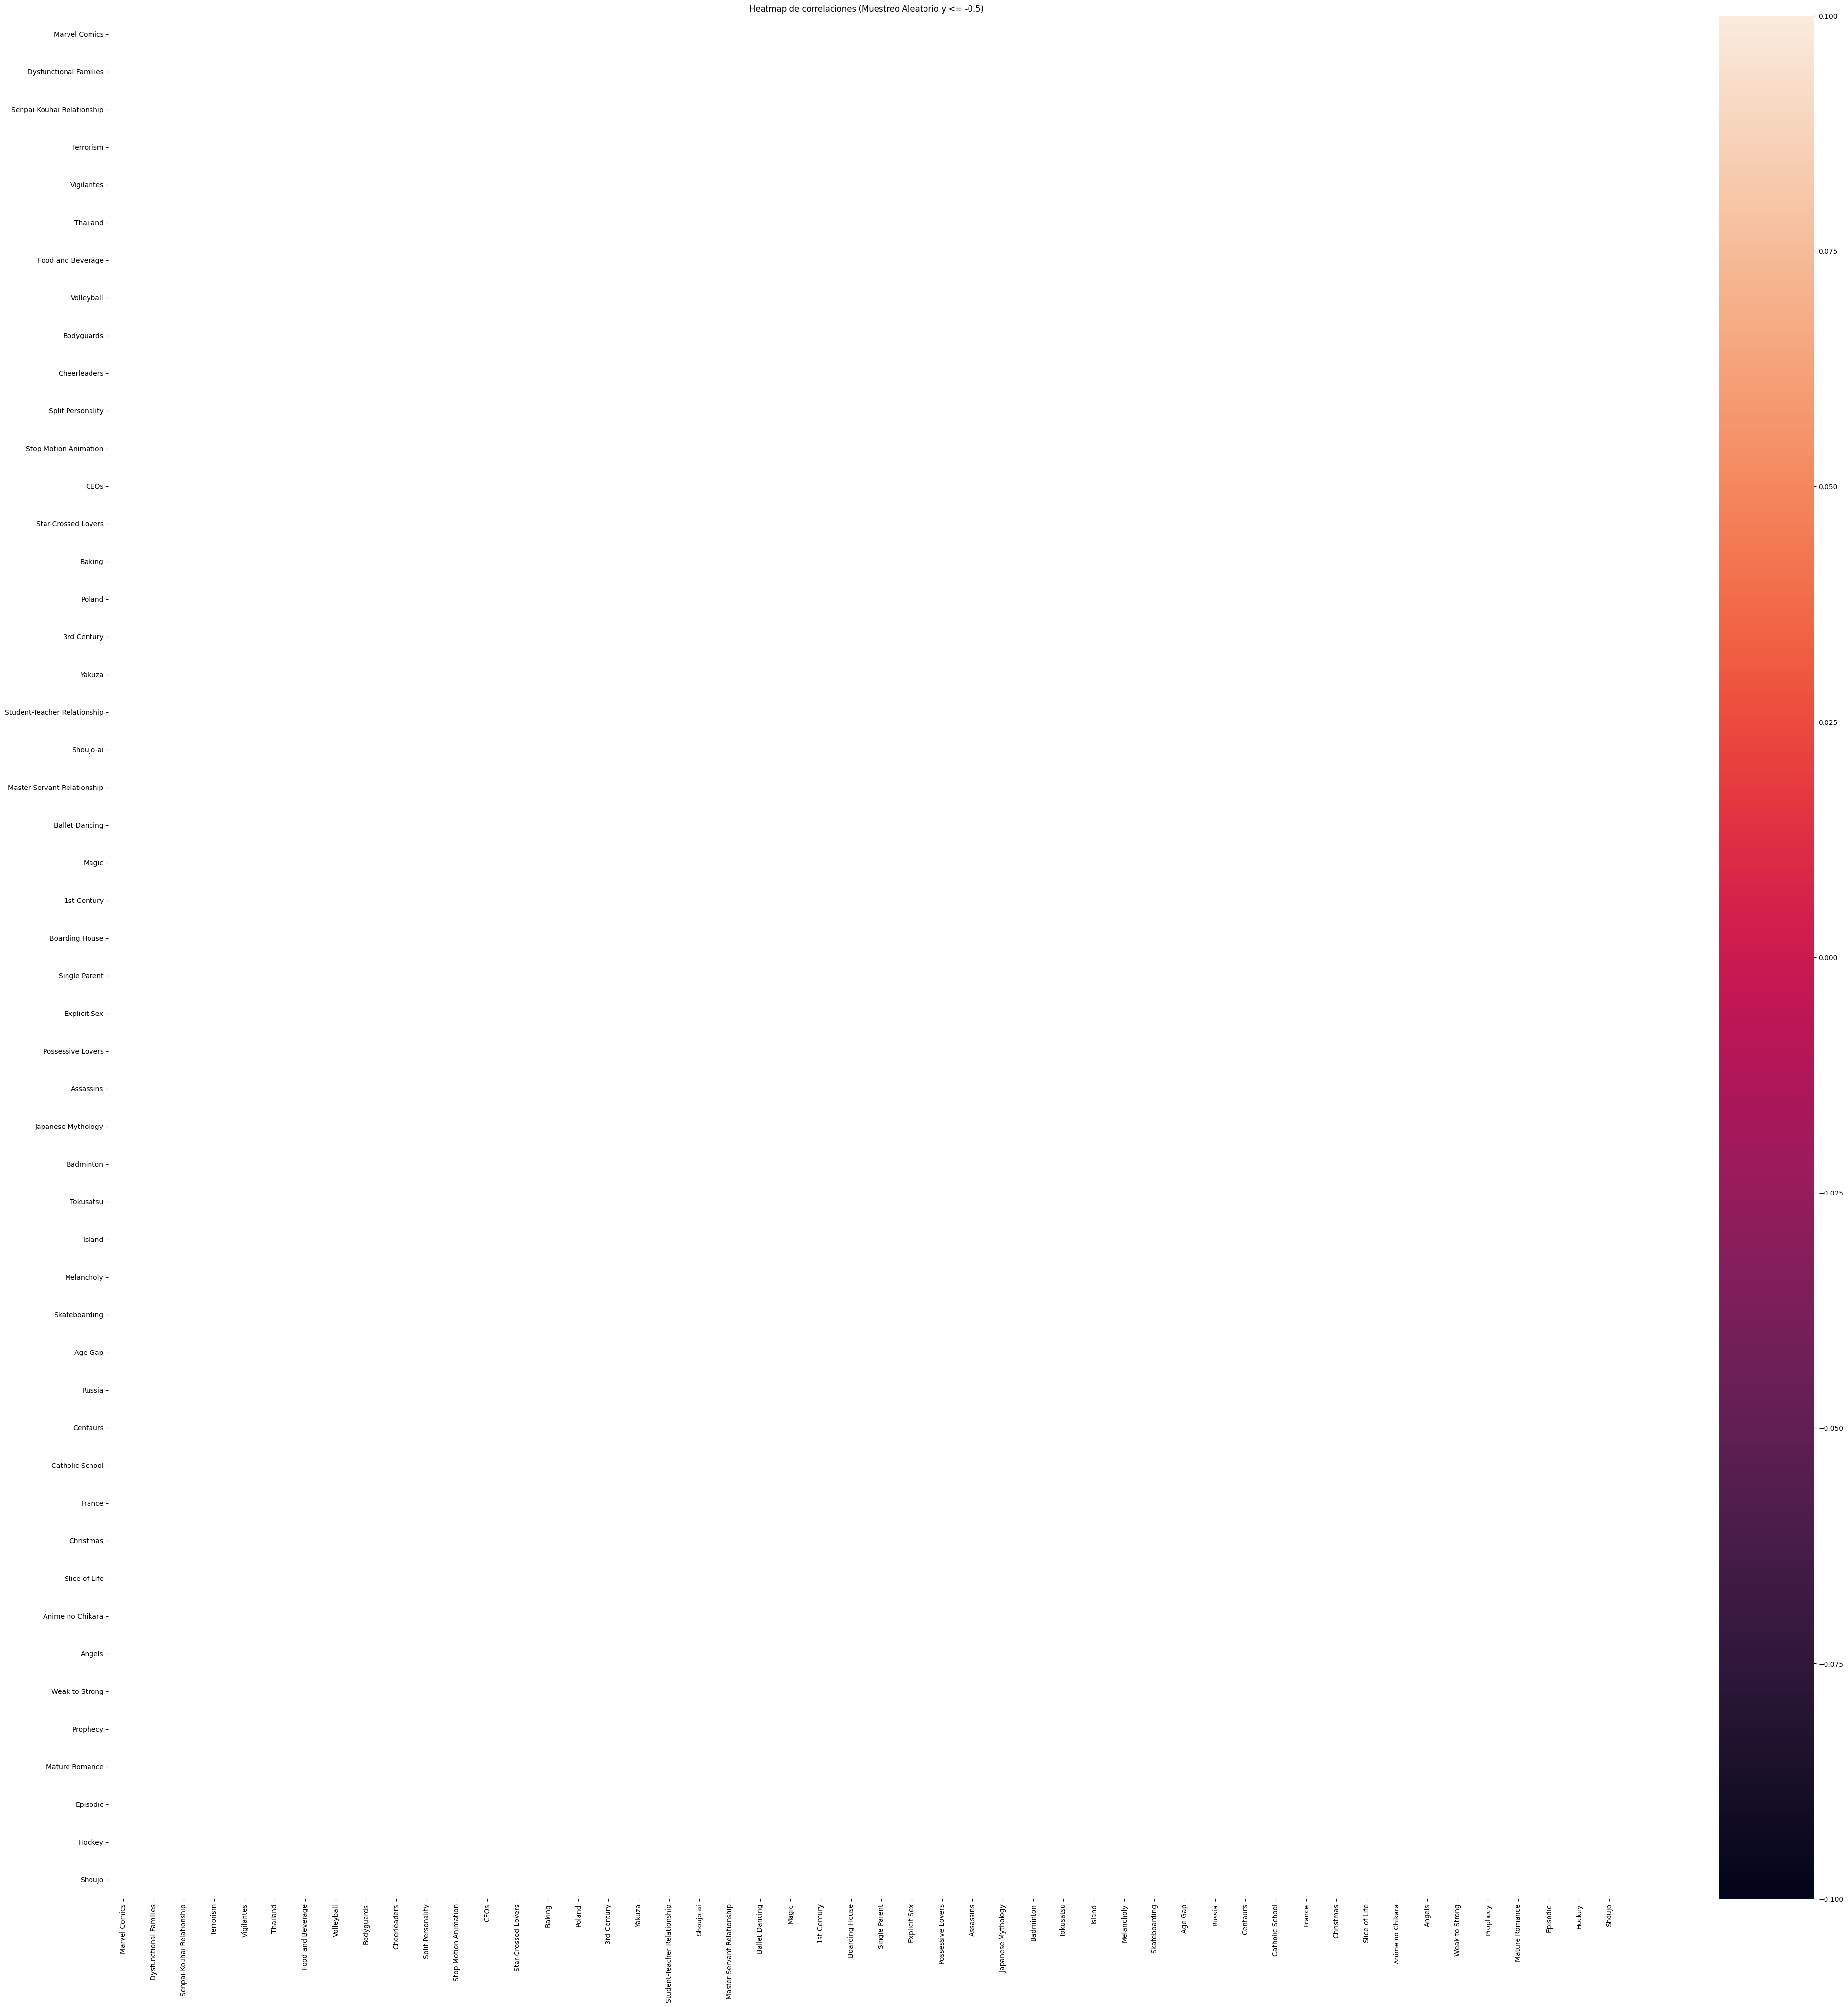

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


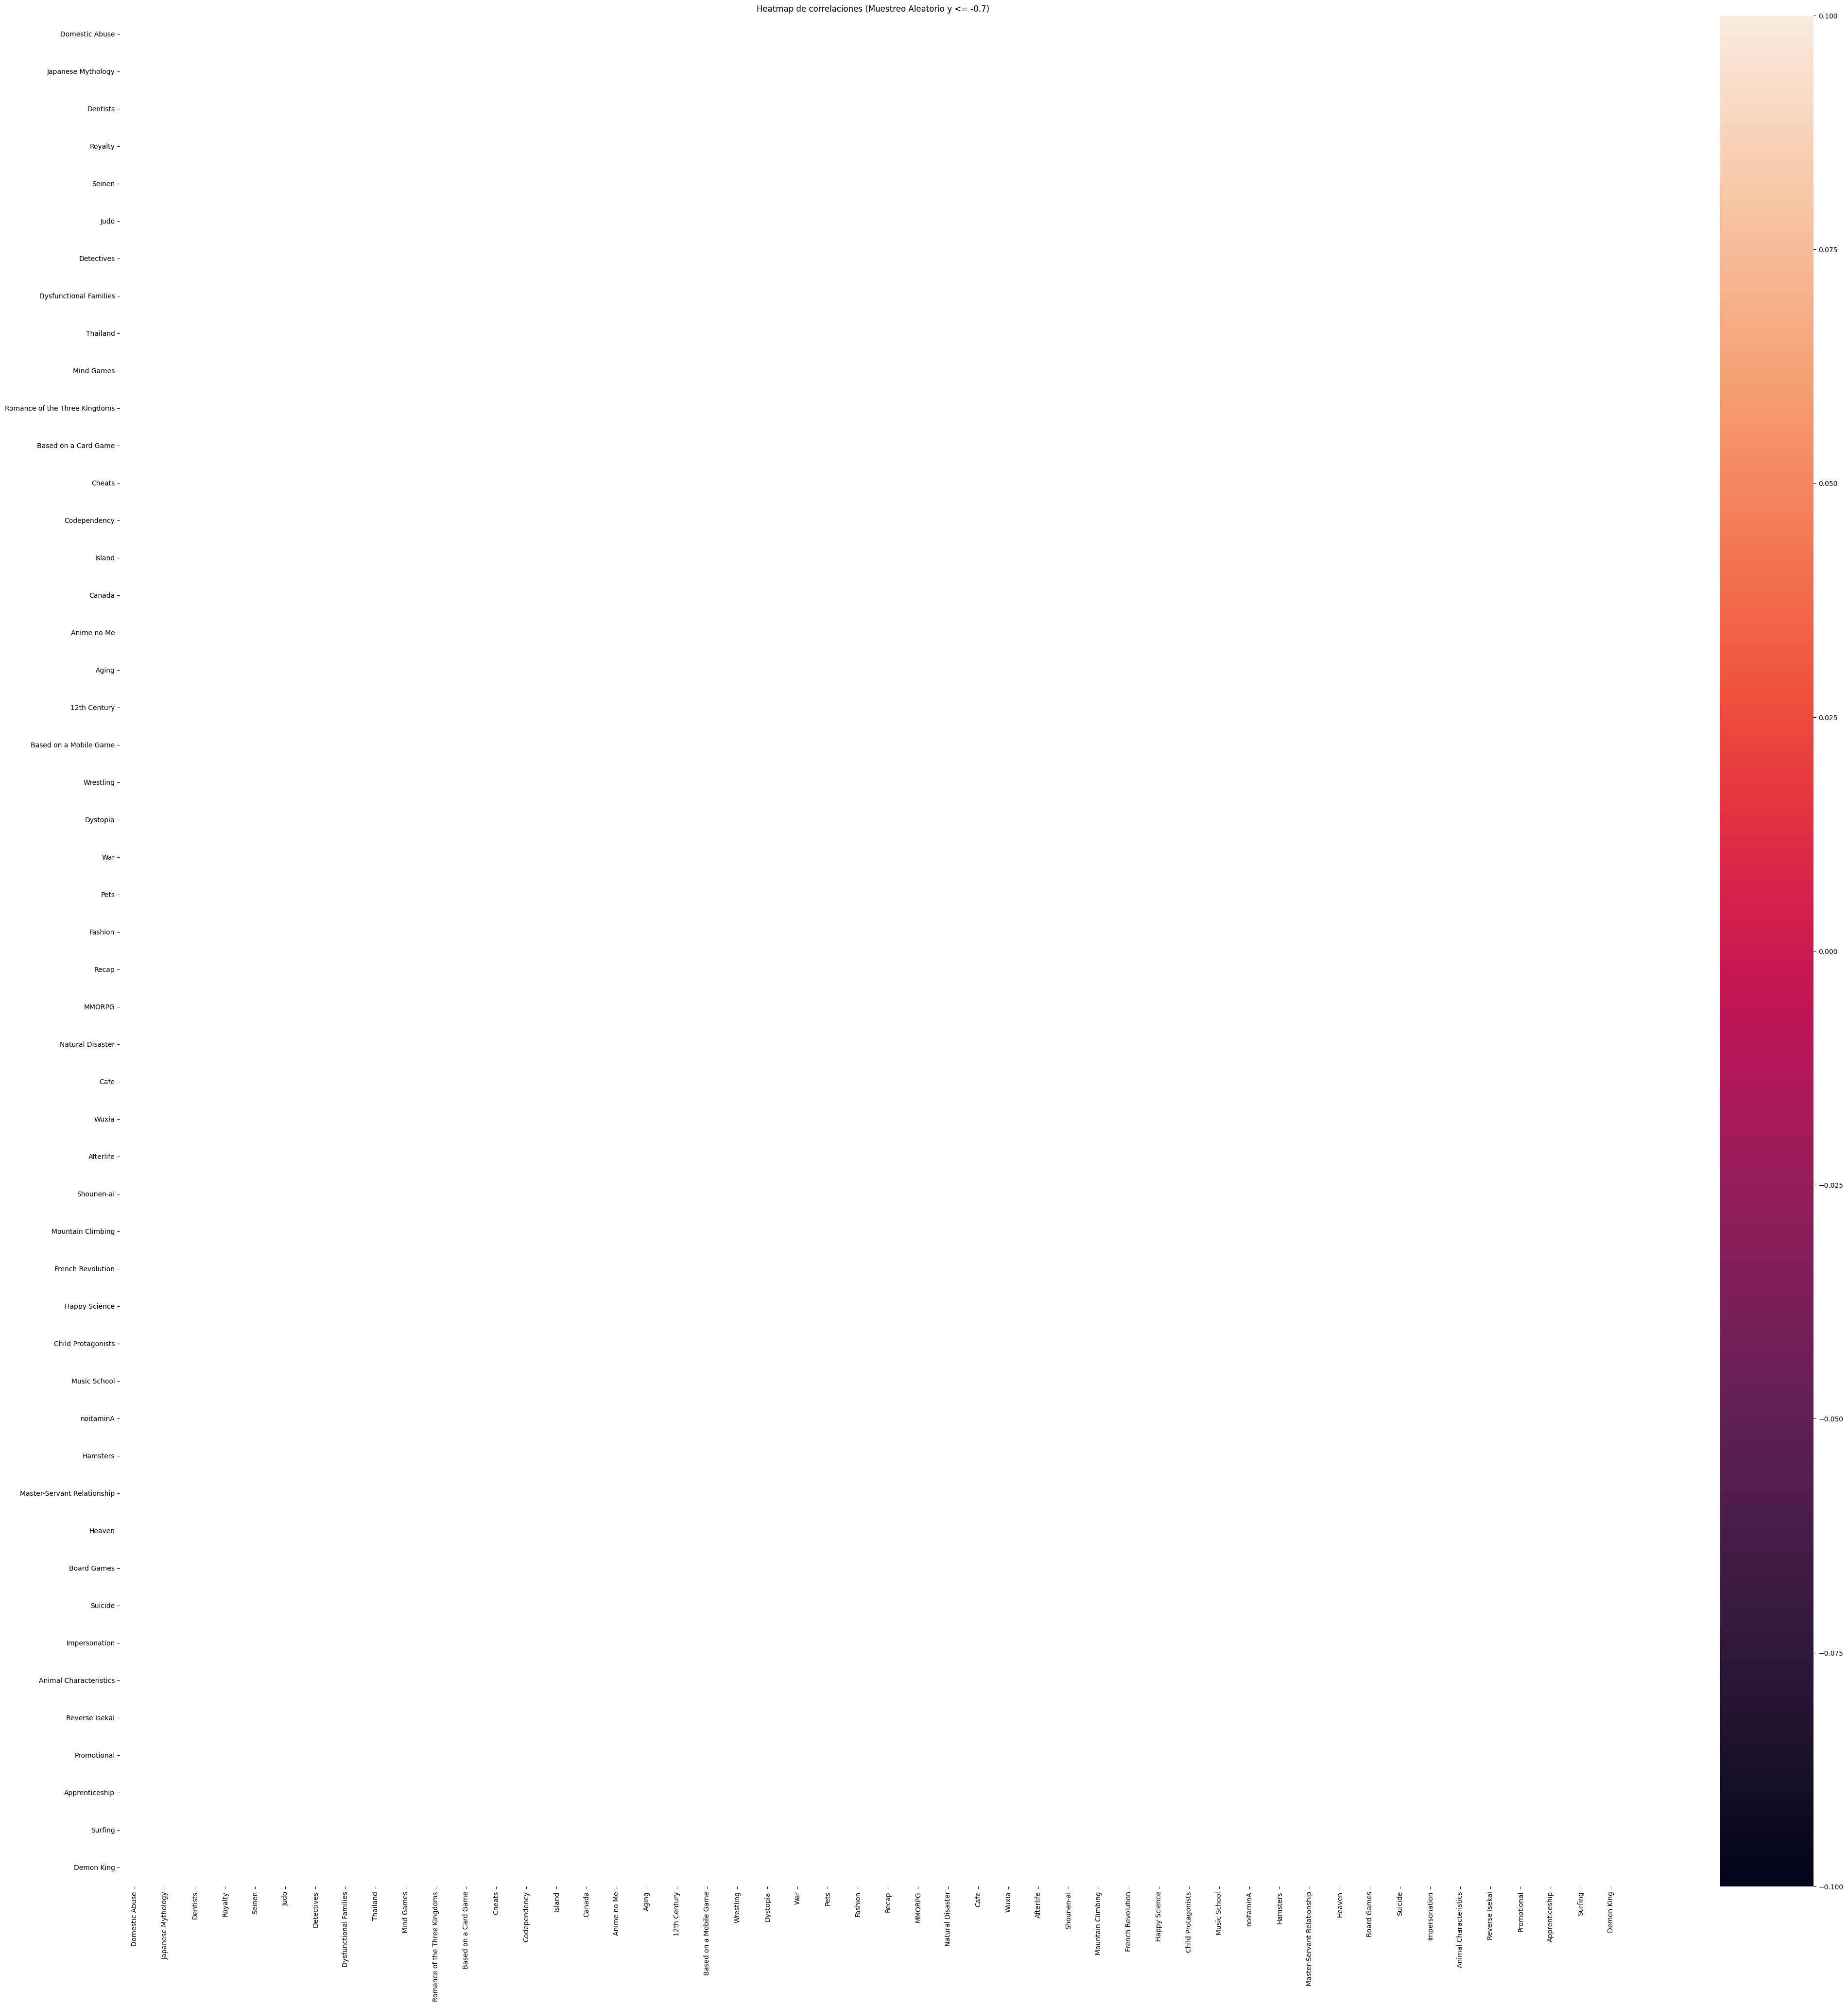

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


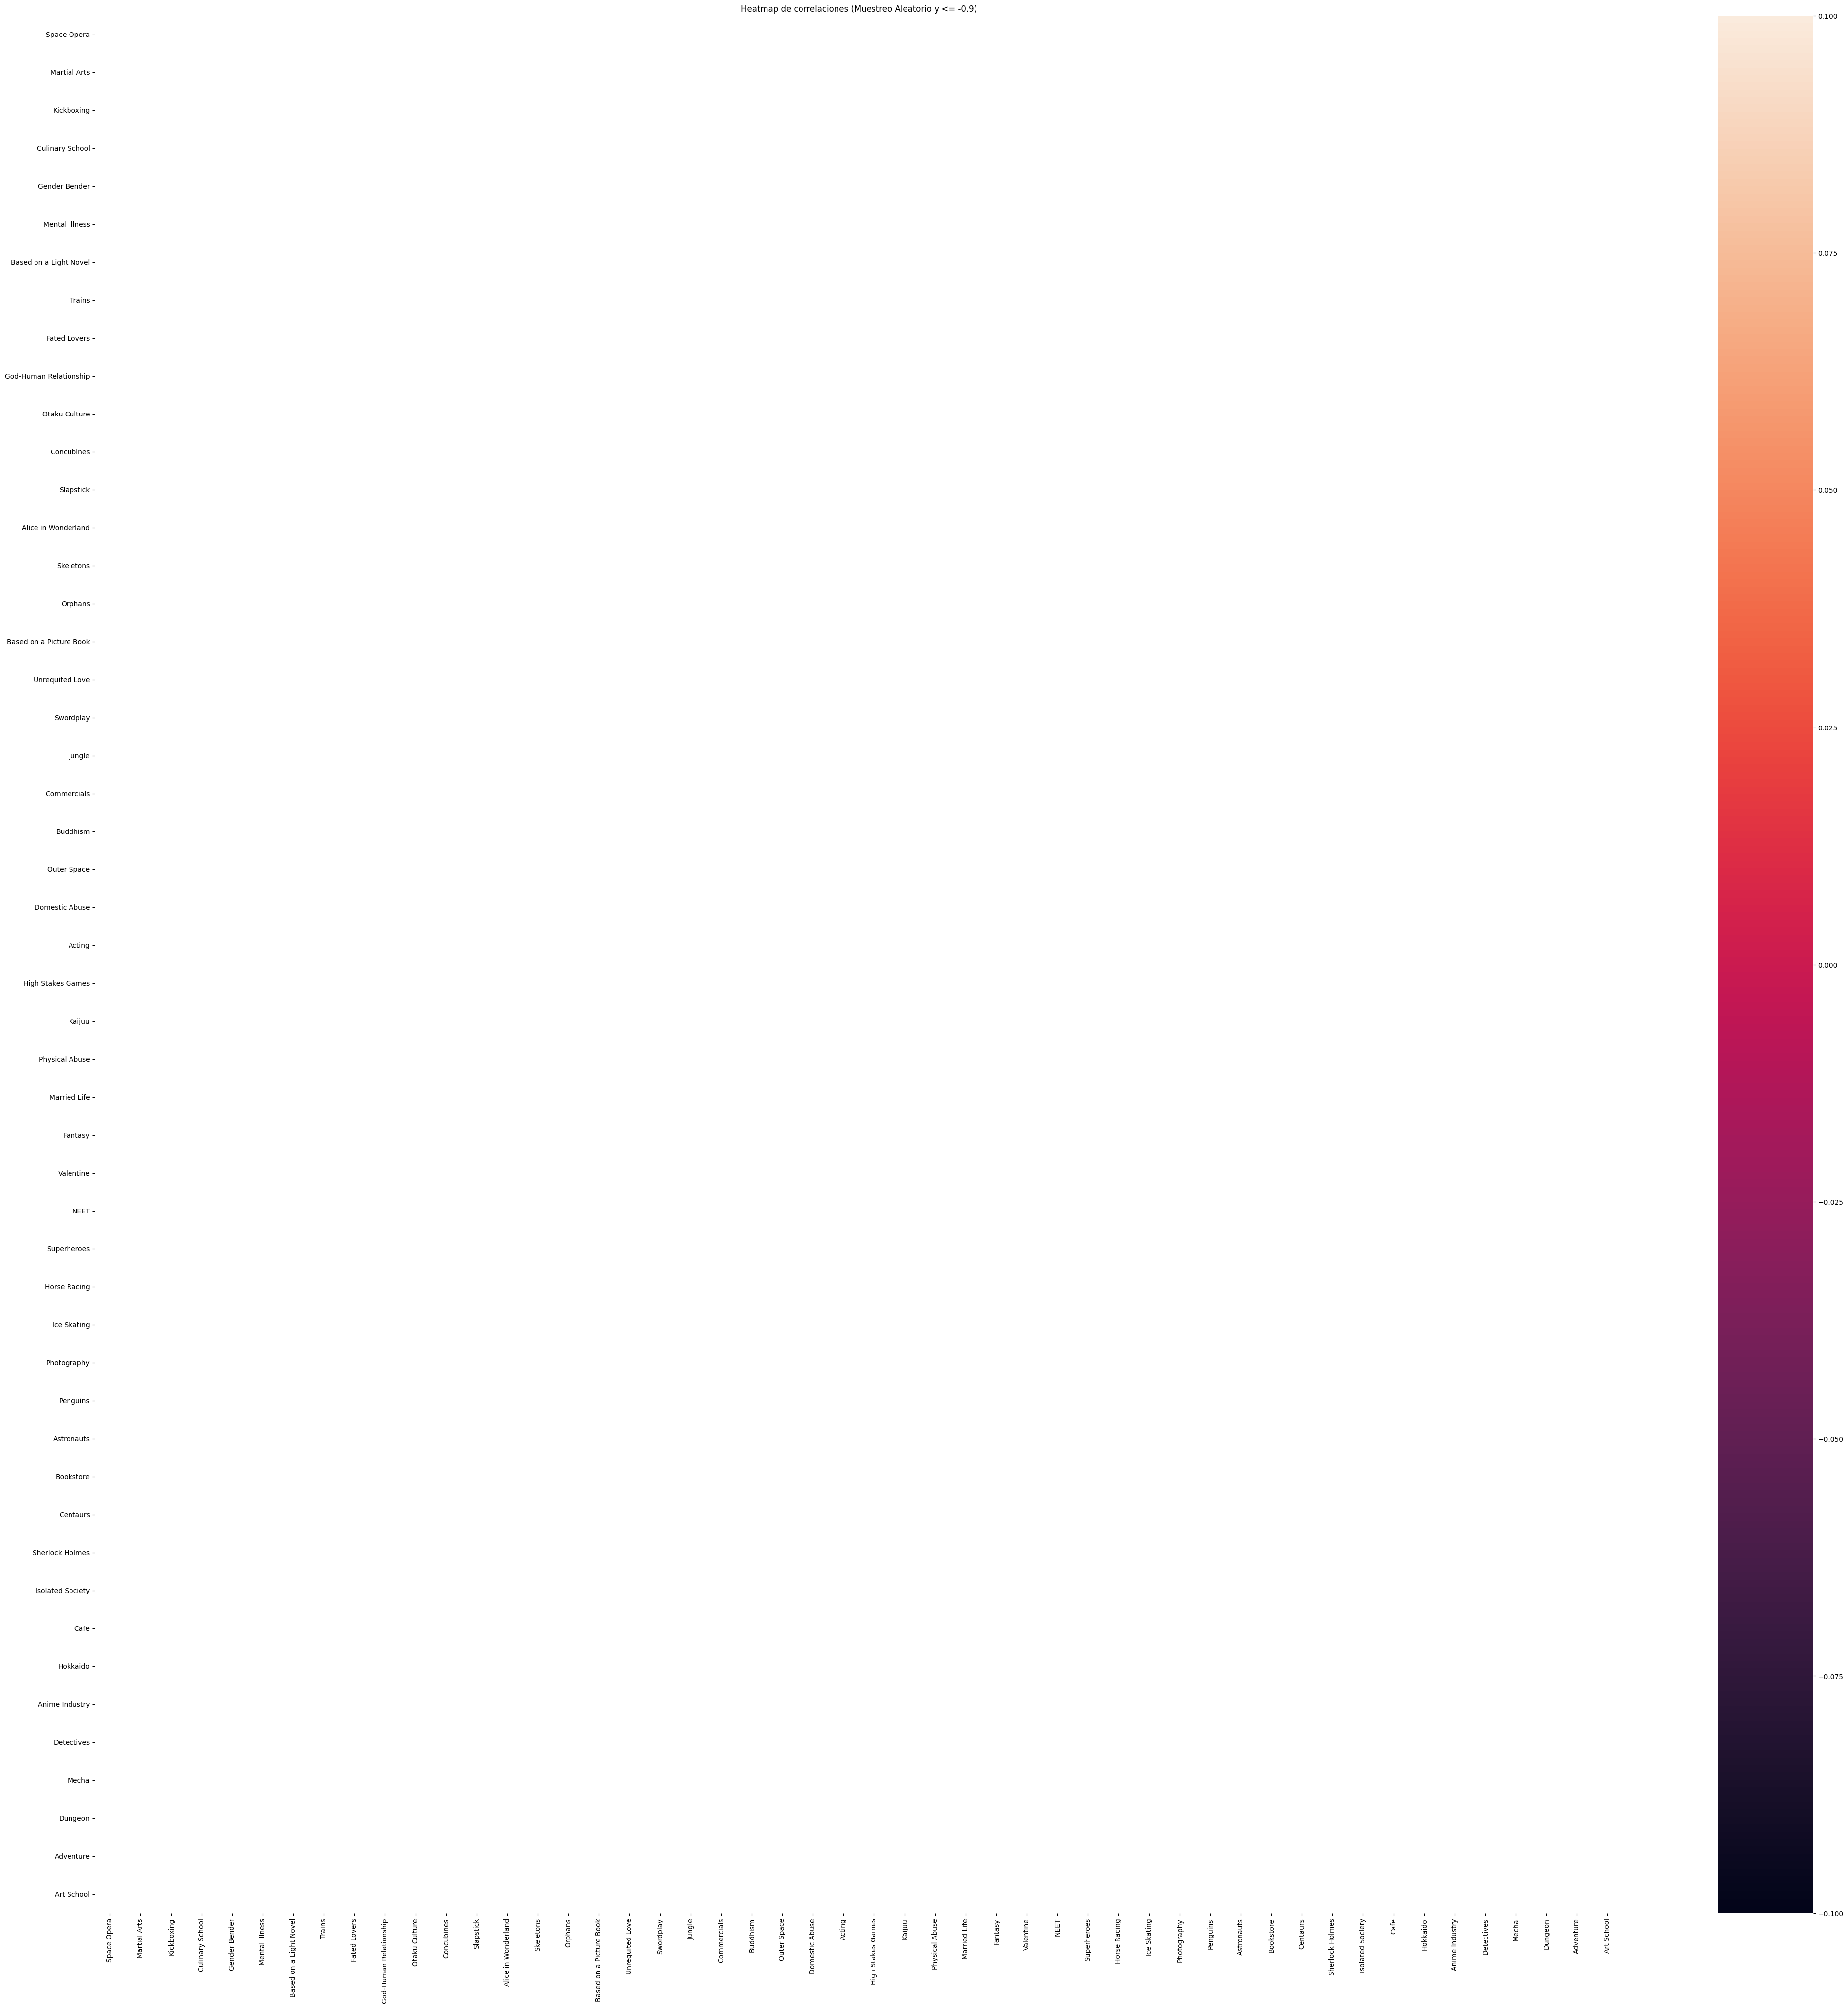

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


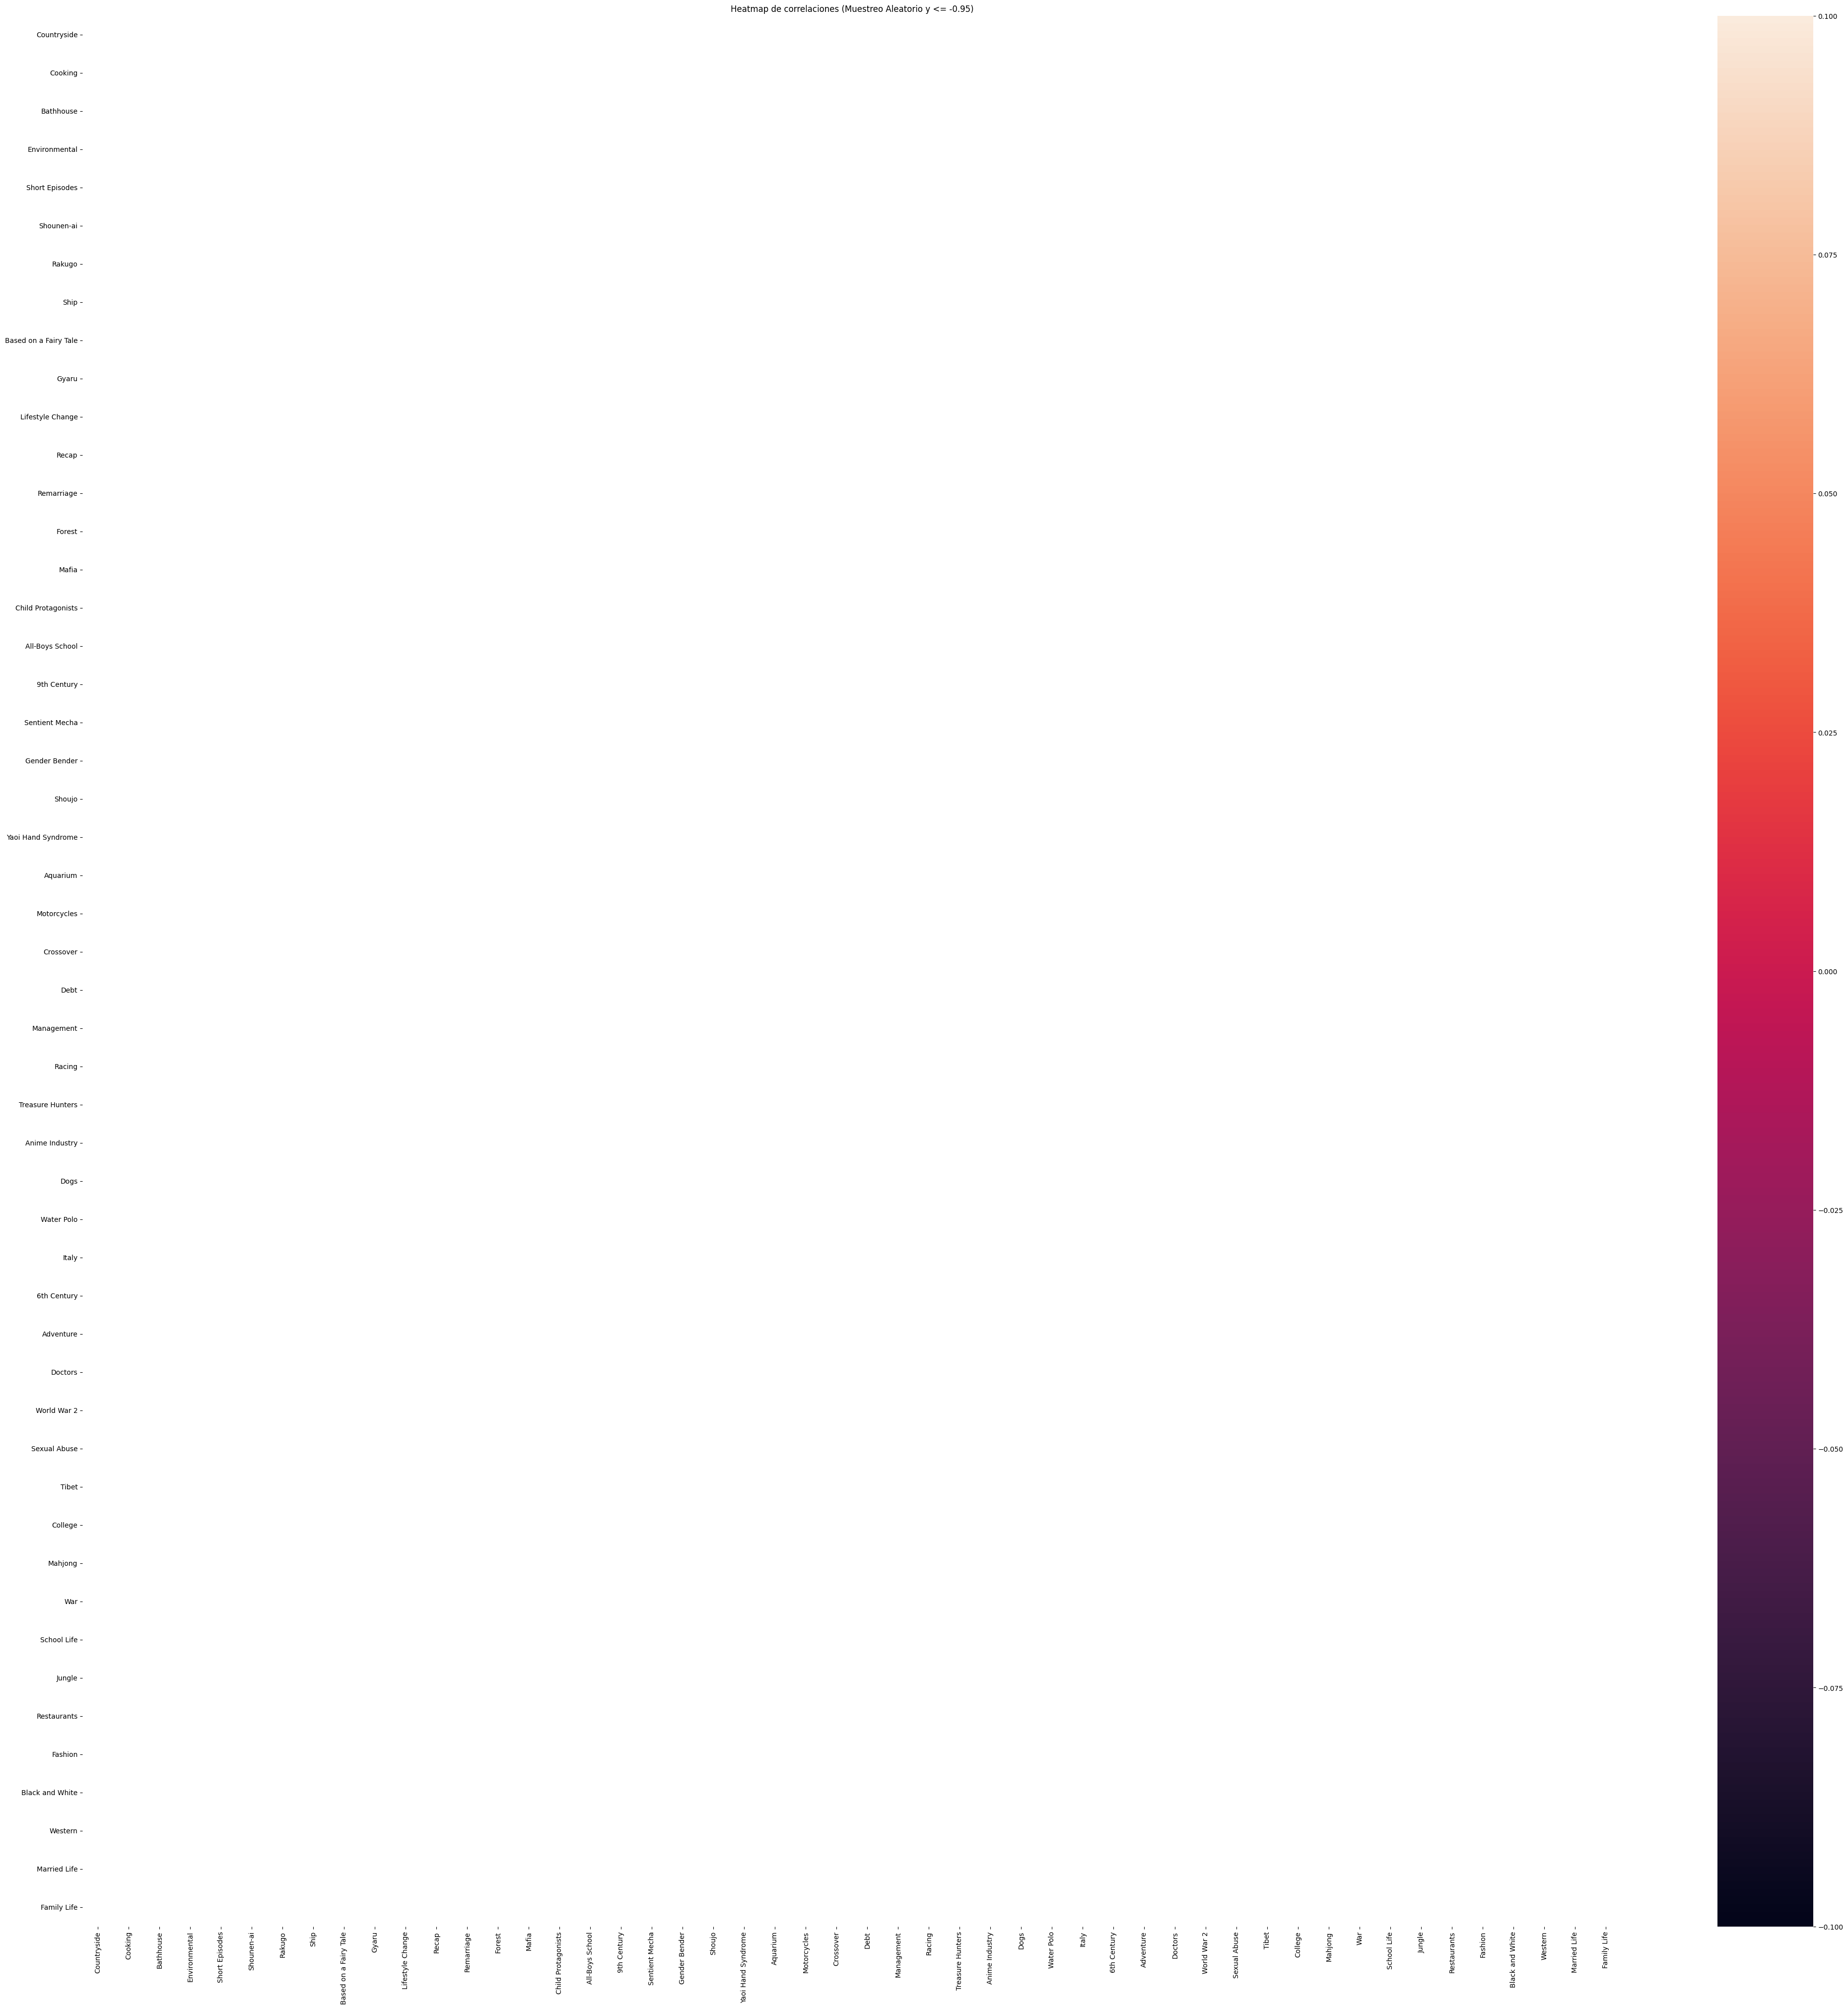

In [39]:
# Ahora, lo mismo de los heatmaps, pero viendo correlacciones negativas. De la misma forma, pero
# usando valores de correlacción negativos.

# Número máximo de columnas a mostrar en el heatmap
max_columns_to_show = 50

# Lista de valores de correlación a considerar
corr_values_to_show = [-0.25, -0.5, -0.7, -0.9, -0.95]

for corr_value in corr_values_to_show:
    # Seleccionar un subconjunto aleatorio de columnas
    random_columns = random.sample(
        tags_animes.columns.tolist(),
        k=min(max_columns_to_show, len(tags_animes.columns)),
    )

    # Crear el subset de correlaciones
    corr_subset = tags_animes[random_columns].corr()

    # Filtrar solo las correlaciones que son <= al valor de correlación deseado
    corr_subset = corr_subset[corr_subset.abs() <= corr_value]

    # Eliminar la diagonal estableciéndola a NaN
    np.fill_diagonal(corr_subset.values, np.nan)

    # Obtener el número de filas y columnas del subset
    rows, cols = corr_subset.shape

    # Crear el subplot
    fig, ax = plt.subplots(figsize=(cols, rows))

    # Crear el heatmap
    sns.heatmap(corr_subset, annot=True, ax=ax)

    # Ponerle título al heatmap
    ax.set_title(f"Heatmap de correlaciones (Muestreo Aleatorio y <= {corr_value})")

    # Mostrar el heatmap
    plt.show()

In [40]:
# En específico, imprimir las correlaciones <= -0.95, que no sean con el mismo tag (diagonal).

corr_subset = tags_animes.corr()[tags_animes.corr() <= -0.95]

print("Correlaciones <= -0.95:")

for col in corr_subset.columns:
    for row in corr_subset.index:
        if col != row and not np.isnan(corr_subset.loc[row, col]):
            print(
                f"\t{row} y {col} tienen una correlación de {corr_subset.loc[row, col]}"
            )

Correlaciones <= -0.95:


Como no se halló nada, ampliemos la brecha.

In [41]:
corr_subset = tags_animes.corr()[tags_animes.corr() <= -0.75]

print("Correlaciones <= -0.75:")

for col in corr_subset.columns:
    for row in corr_subset.index:
        if col != row and not np.isnan(corr_subset.loc[row, col]):
            print(
                f"\t{row} y {col} tienen una correlación de {corr_subset.loc[row, col]}"
            )

Correlaciones <= -0.75:


Ampliemos la brecha aún más.

In [42]:
corr_subset = tags_animes.corr()[tags_animes.corr() <= -0.5]

print("Correlaciones <= -0.5:")

for col in corr_subset.columns:
    for row in corr_subset.index:
        if col != row and not np.isnan(corr_subset.loc[row, col]):
            print(
                f"\t{row} y {col} tienen una correlación de {corr_subset.loc[row, col]}"
            )

Correlaciones <= -0.5:


Ampliemos la brecha una última vez.

In [43]:
corr_subset = tags_animes.corr()[tags_animes.corr() <= -0.25]

print("Correlaciones <= -0.25:")

for col in corr_subset.columns:
    for row in corr_subset.index:
        if col != row and not np.isnan(corr_subset.loc[row, col]):
            print(
                f"\t{row} y {col} tienen una correlación de {corr_subset.loc[row, col]}"
            )

Correlaciones <= -0.25:
	Original Work y Based on a Manga tienen una correlación de -0.32896162655733396
	Based on a Manga y Original Work tienen una correlación de -0.32896162655733396


No parecen existir correlaciones negativas muy significativas entre los tags, aunque la hallada con
un valor aprox de -0.33 tiene bastante sentido lógico.

Ello, porque que un anime sea "Original Work" se opone a que sea "Based on a Manga", y viceversa,
puesto que explican cosas opuestas. El primer tag habla sobre una creación original, mientras que
el segundo sobre una adaptación de un manga. 

Lo coherente es observar que un anime no puede ser ambas cosas a la vez (no ser puede estar basado
y al mismo ser original), por lo que es lógico que
exista cierta correlación negativa entre ambos tags.

In [44]:
# Columna útil para los gráficos siguientes

tags_animes["Cantidad de Tags"] = tags_animes.sum(axis=1)

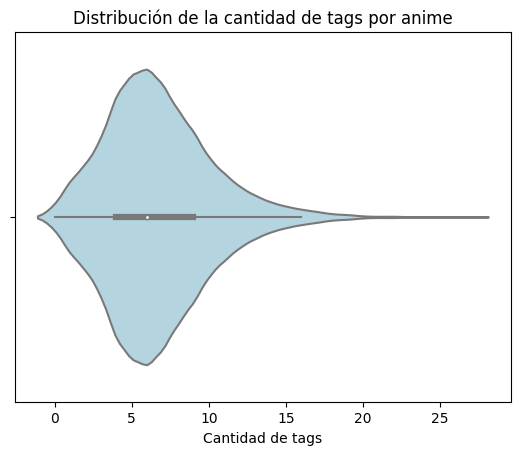

In [45]:
# Violin plot de la cantidad de tags por anime

# Crea un Violin Plot


sns.violinplot(x=tags_animes["Cantidad de Tags"], color="lightblue")

# Etiqueta del eje x
plt.xlabel("Cantidad de tags")

# Título del gráfico
plt.title("Distribución de la cantidad de tags por anime")

# Mostrar el gráfico
plt.show()

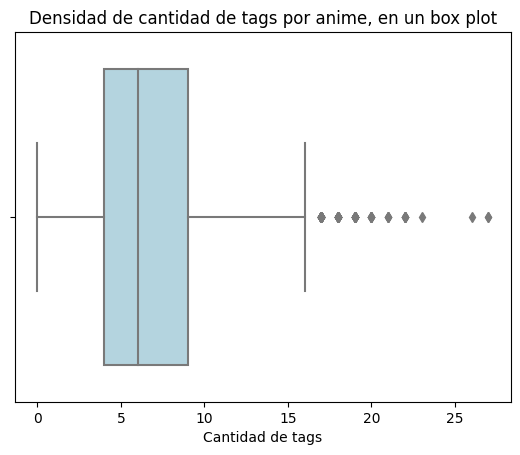

In [46]:
# Box plot de la cantidad de tags por anime

sns.boxplot(x=tags_animes["Cantidad de Tags"], color="lightblue")

# Label del eje x
plt.xlabel("Cantidad de tags")

# Título del gráfico

plt.title("Densidad de cantidad de tags por anime, en un box plot")

# Mostrar el gráfico

plt.show()

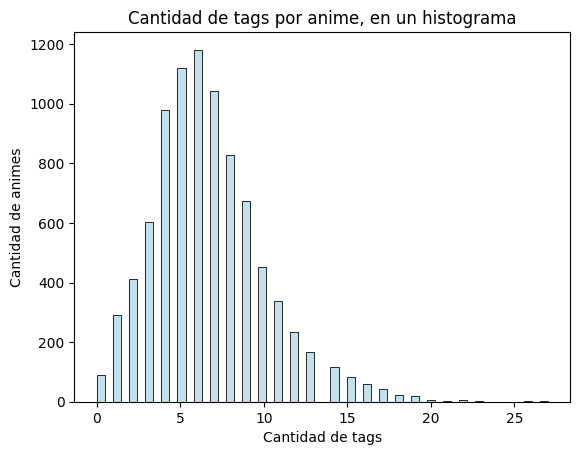

In [47]:
# Histograma que muestra la cantidad de tags por anime

sns.histplot(x=tags_animes["Cantidad de Tags"], color="lightblue")

# Label del eje x
plt.xlabel("Cantidad de tags")

# Label del eje y
plt.ylabel("Cantidad de animes")

# Título del gráfico

plt.title("Cantidad de tags por anime, en un histograma")

# Mostrar el gráfico

plt.show()

Text(0.5, 1.0, 'Medidas de tendencia de la cantidad de tags por anime')

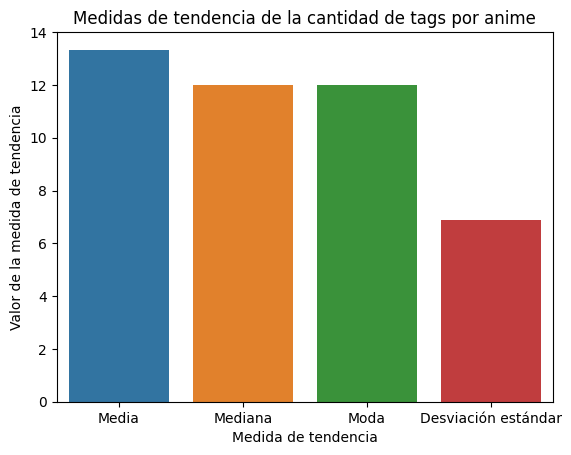

In [48]:
# Distribución en un gráfico de barras sobre distintas medidas de tendencia de la cantidad de tags
# por anime (media, mediana, moda, desviación estándar)

# Obtener la media, mediana, moda y desviación estándar de la cantidad de tags por anime

mean = tags_animes.sum(axis=1).mean()
median = tags_animes.sum(axis=1).median()
mode = tags_animes.sum(axis=1).mode()[0]
std = tags_animes.sum(axis=1).std()

# Crear el gráfico de barras

sns.barplot(
    x=["Media", "Mediana", "Moda", "Desviación estándar"], y=[mean, median, mode, std]
)

# Label del eje x

plt.xlabel("Medida de tendencia")

# Label del eje y

plt.ylabel("Valor de la medida de tendencia")

# Título del gráfico

plt.title("Medidas de tendencia de la cantidad de tags por anime")

In [49]:
print(
    f"Se obtuvo una media de {mean}, una mediana de {median}, una moda de {mode} y una desviación estándar de {std}. Si comparamos los valores, tenemos lo siguiente:"
)

if mean > median:
    print("\tLa media es mayor que la mediana")
elif mean < median:
    print("\tLa media es menor que la mediana")
if mean > mode:
    print("\tLa media es mayor que la moda")
elif mean < mode:
    print("\tLa media es menor que la moda")
if mean > std:
    print("\tLa media es mayor que la desviación estándar")
elif mean < std:
    print("\tLa media es menor que la desviación estándar")
if median > mode:
    print("\tLa mediana es mayor que la moda")
elif median < mode:
    print("\tLa mediana es menor que la moda")
if median > std:
    print("\tLa mediana es mayor que la desviación estándar")
elif median < std:
    print("\tLa mediana es menor que la desviación estándar")
if mode > std:
    print("\tLa moda es mayor que la desviación estándar")
elif mode < std:
    print("\tLa moda es menor que la desviación estándar")

Se obtuvo una media de 13.333561331509348, una mediana de 12.0, una moda de 12 y una desviación estándar de 6.871261067391777. Si comparamos los valores, tenemos lo siguiente:
	La media es mayor que la mediana
	La media es mayor que la moda
	La media es mayor que la desviación estándar
	La mediana es mayor que la desviación estándar
	La moda es mayor que la desviación estándar


### En Dataframe 3: `detalles_animes.csv`

## Análisis de datos:

### Introducción del clustering (recapitulación de la propuesta)

Para este proyecto, la herramienta estelar y basal que se usará es el clustering. Pero… ¿en qué consiste
el clustering? Buscando en internet se encontró una muy buena y clara definición escrita por Joaquín
Amat Rodrigo, un sénior Data Scientist español que cuenta con una web de divulgación de su área
bastante completa e informativa.

* *“El término clustering hace referencia a un amplio abanico de técnicas cuya finalidad es
encontrar patrones o grupos (clusters) dentro de un conjunto de observaciones. Las
particiones se establecen de forma que, las observaciones que están dentro de un mismo
grupo son similares entre ellas y distintas a las observaciones de otros grupos. Se trata
de un método de aprendizaje no supervisado (unsupervised), ya que el proceso no tiene
en cuenta a qué grupo pertenece realmente cada observación (si es que existe tal
información). Esta característica es la que diferencia al clustering de los métodos de
clasificación en el que sí emplea la verdadera clasificación durante su entrenamiento.”*
(Amat Rodrigo, 2020)

Como nuestra intención es precisamente encontrar conjuntos de usuarios similares de MyAnimeList,
es sumamente razonable que utilicemos dicha herramienta, la cual se encuentra implementada en la
librería scikit-learn de Python. En su página web, se describen los distintos algoritmos de clustering
que se pueden aplicar, mas se reconoce que en esta etapa del proyecto se desconoce cuál finalmente
se llegará a ocupar. Creemos que todavía nos falta el conocimiento necesario para responder dicha
interrogante y, además, solamente luego de realizar un análisis exhaustivo a los datos del trabajo se
podrá tomar una verdadera decisión más informada y consciente respecto a ello. Menciónese que
dicha librería también podrá sernos útil en el caso de que veamos conveniente realizar regresiones.
Primeramente, nuestro plan de proyecto parte con el paso de reunir los datos necesarios que
necesitamos para el cumplimiento de nuestros objetivos. Veamos que la fuente original de nuestros
datos se puede encontrar en sitios web, y, más específicamente, la data de MAL es factible de conseguir
fundamentalmente utilizando su API oficial, mientras que la data de Anime-Planet se tendrá que
conseguir bajo web scraping. Para estas labores, se utilizarán las librerías de pandas (para crear los
dataframes), requests y BeautifulSoup (obtención de información). Sin embargo, plantéese que un
inconveniente el cual tendremos que enfrentar es el hecho de que no es muy viable conseguir en un
reducido tiempo la data de la lista de usuarios de los más de 15 millones de usuarios de MyAnimeList.
Por lo tanto, se necesitará antes determinar una muestra aleatoria de los usuarios, y para ello una
posibilidad es usar la librería matemática de Numpy. Ya con todos los datos recopilados, puede pasarse
a la siguiente etapa.

Segundamente, lo elemental que debemos realizar para nuestro proyecto es una limpieza y
exploración de los datos que hayamos recolectado. Esto, es especialmente relevante teniendo en
cuenta el contexto de que los datos que trabajaremos serán obtenidos en base a la utilización de una
API y web scraping, y puede que en ambos procesos existan fallas inherentes en los valores extraídos
o una cantidad importante de información nula. Es nuestra responsabilidad revisar atenta y
minuciosamente cualquier tipo de desperfecto en dichos datos para corregirlos; así como igualmente
descartar posible información que lleguemos a considerar innecesaria y podría sobrecargar la carga
computacional asociada a los algoritmos que se usarán; disminuyendo y entorpeciendo nuestro
avance en el proyecto.


Terceramente, se piensa realizar lo ya mencionado, el susodicho clustering. De acuerdo con sus
resultados, se analizará cuál (si existe) es un nombre adecuado para cada grupo generado; viendo si
reúne las características habituales que siguen las comunidades de fans de la animación (gusto o
interés por una estética (temáticas) en concreto y/o juicio más o menos severo con respecto a lo
pensado de la calidad de las obras visualizadas).

----------------------------------------------------------------------------------------------------------------------------

Dicho texto, extraído de la propuesta de proyecto, efectivamente logró ser realidad. En específico,
la parte de descargar la información vía web scraping fue la más compleja de todas, y ciertamente
fue considerablemente lenta en general para la cantidad de información que se quería obtener. 

## Resumen de los resultados

## ¿Qué podría salir mal?

### Data insuficiente

Al momento de recolectar los usuarios de MAL, si bien se recolectó una amplia cantidad de usuarios,
puede que no haya sido lo suficiente para poder realizar un buen modelo de clustering. Ello puede
deberse a que se cree que igualmente existe una gran variedad en los gustos y estadísticas de los
usuarios de MAL, por lo que se necesitaría una cantidad de usuarios mucho mayor para el poder
identificar realmente todos los grupos o comunidades que existn en MAL. 

Como se dijo previamente en la sección de contexto, el sitio web cuenta con más de 15 millones de
cuentas, y, debido a lo lento y tedioso que supone el extraer la información de cada usuario,
solamente se consideró la información de cerca de 9000 usuarios. Si bien es una cantidad bastante
alta, en comparación a la cantidad total de usuarios, no es muy significativa. Por lo tanto, para
una mejor iteración del proyecto, se recomienda extraer más información de los usuarios, para así
llegar a mejores conclusiones.

Valdría la pena considerar posteriormente la diferencia en los resultados obtenidos al considerar
una mayor cantidad de usuarios, y si es que se obtienen resultados más precisos o no, y bueno,
realmente distintos o no. Nuestra suposición inicial es que dentro del sitio web podría existir una
muy amplia categorización de usuarios, lo que acentúa la necesidad de considerar una mayor muestra
para efectos prácticos. Aunque dicha suposición podría estar errónea; habría que comprobarlo.


En efecto, veáse lo siguiente:

In [5]:
print(f"El tamaño de la muestra elegida representa cerca de {9000/15000000*100}% de la base de datos de MyAnimeList.")

El tamaño de la muestra elegida representa cerca de 0.06% de la base de datos de MyAnimeList.


### Daño a la privacidad

En este proyecto, se utilizó información de usuarios de MAL, y se tiene en cuenta el username de
cada persona. En ese sentido, podría argumentarse que se está vulnerando en algún grado la privacidad de
los usuarios, puesto que se está utilizando información de ellos sin su consentimiento. Sin
embargo, se considera que no se está haciendo un mal uso de la información, puesto que dicha
información en principio no es sensible y se encuentra de público acceso en internet. 

Igualmente, en este proyecto para evitar cualquier problemática relacionada, podría haberse evitado
el trabajar con los nombres de usuario, y en su lugar haber utilizado un identificador único
aleatorio para cada usuario, que no tuviera relación con su nombre de usuario. Asimismo, otra forma
de solventar dicho problema habría sido consultar a la gente de MAL si están de acuerdos con el uso
que en este trabajo le dimos a su información, aunque ello habría tardado un tiempo considerable y
habría supuesto más dificultades logísticas por un lado.

Así, y considerando el libro de "Weapons of Math Destruction", es innegable que un uso masivo de la
información de usuarios podría acarrear consecuencias nocivas si no se tiene en consideración la
ética de la situación. Para este proyecto, las consecuencias no tienen un carácter tan grave, dado
que lo máximo que se podría hacer en principio con el clustering es colocar anuncios personalizados a los
usuarios de MAL, que consistirían en recomendarles animes que según el modelo les gusten en base a
su cercanía con cierta comunidad . Pero, si llegamos a considerar la fusión de esta información con otras fuentes con un nexo en común, ello
podría llegar a ser un problema si consideramos lo perjudicial de la publicidad invasiva y engañosa
que se puede generar. Se puede decir que es debido en parte a este último caso que suele ser
recomendable anonimizar los datos, para evitar que se pueda llegar a identificar a una persona en
cuestión en internet, dada la conexión que hoy en día se puede hacer con decenas de fuentes de
datos. 

### Búsqueda de patrones donde no existen en primer lugar

Como caso a considerar, puede llegar a existir el caso donde se busquen patrones en los datos, pero
la realidad es que estos estén muy separados desde un comienzo y no sean aptos para la aplicación
de modelos. Es decir, que no existan tendencias o comunidades que sirvan para el fin de nuestro
proyecto, y ciertamente nuestra pregunta no pueda tener una respuesta satisfactoria.

O, por otra parte, que las asociaciones sean tan intrincadas y difusas; complejas, que ningún
modelo existente al día de hoy las pueda identificar apropiadamente. Para resolver aquello, debería
aspirarse siempre a mejorar y variar los modelos utilizados para la Ciencia de Datos, y, no
quedarse todo el rato con lo mismo.

### Uso de datos que no desean ser usados

Dadas las dificultades inherentes que surgieron al realizar el scraping de los datos en
Anime-Planet, podría cuestionarse si verdaderamente el sitio web autoriza o no el uso de su
información para los fines aquí presentados. Por el momento, Anime-Planet no tiene una API oficial,
y la simulación requerida en los headers de las peticiones HTTP para poder realizar el scraping de
la información podría llegar a ser considerada como una violación a los términos de uso del sitio
web.

En ese sentido, se podría argumentar que el uso de los datos de Anime-Planet no es ético, y que
sería recomendable acercarse a los dueños del sitio web para consultarles si están de acuerdo con
lo realizado. Similarmente, sería una buena idea plantear a Anime-Planet la posibilidad de que abran una API
oficial, y se puedan evitar las problemáticas enfrentadas en este proyecto. 

### Problema de Escalabilidad

Este proyecto utiliza dataframes que, con la información de cerca de 9000 usuarios, ya tienen un tamaño
bastante considerable. Ahora bien, ¿qué pasaría si se quisiera escalar el proyecto a un nivel de
todos los usuarios de MyAnimeList en un momento dado? 

Creemos que ello requeriría de un excesivo tiempo de computación para el clustering, y no sería muy
cómodo de realizarse por un usuario común y corriente. La información que se utiliza sería excesiva
y probablemente cualuquier cambio hacia el modelo tardaría eternidades en hacerse efecto. Por
nuestros conocimientos actuales, si bien en el proyecto implementamos formas de paralelizar la
descarga de datos y reducir el tamaño de los dataframes (sparse matrices), no sabemos si existen
métodos aún mejores para manipular tales niveles de información.

Ello también convierte a este trabajo como uno imposible de cambiar seguidamente, a menos que
ciertos métodos de computación sean mejorados. Nos haría falta conocimientos avanzados de Big Data
para realizar un mejor trabajo. 